# JUDGEMENTS CLASSIFICATION

# Data Preprocessing

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pingouin as pg

## Loading the main dataset

In [50]:
dataset = pd.read_csv('Dataset_A_Authors.csv')

dataset.to_csv('DATASET_A.csv', index=False)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 28 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   SCENARIO_CODE                                                             1177 non-null   object 
 1   FEATURE_URL                                                               1177 non-null   object 
 2   FEATURE FILE                                                              1177 non-null   object 
 3   SCENARIO_TITLE                                                            1176 non-null   object 
 4   SCENARIO                                                                  1177 non-null   object 
 5   POINTS                                                                    1177 non-null   float64
 6   Capitalize Gherkin keywords                                     

# Loading dataset 2 (human judgements)

In [4]:
dataset_kobo = pd.read_csv('Judgements.csv')

dataset_kobo.to_csv('DATASET_B.csv', index=False)

dataset_kobo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703 entries, 0 to 702
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SCENARIO_CODE  703 non-null    object 
 1   RES1           647 non-null    float64
 2   RES2           636 non-null    float64
 3   RES3           285 non-null    float64
 4   RES4           61 non-null     float64
dtypes: float64(4), object(1)
memory usage: 27.6+ KB


In [5]:
frames = [dataset_kobo.RES1,dataset_kobo.RES2, dataset_kobo.RES3]
judgements = pd.DataFrame(data=pd.concat(frames), columns={"JUDGEMENTS"}, dtype=np.int8)
totalJudgementsB4=judgements.count()
print("Total judgements: ",totalJudgementsB4)

Total judgements:  JUDGEMENTS    1568
dtype: int64


/var/folders/wb/ld1tg0kd1kb_xl6bj6g_1fq00000gn/T/ipykernel_56801/2006295552.py:2: FutureWarning: In a future version, passing float-dtype values containing NaN and an integer dtype will raise IntCastingNaNError (subclass of ValueError) instead of silently ignoring the passed dtype. To retain the old behavior, call Series(arr) or DataFrame(arr) without passing a dtype.
  judgements = pd.DataFrame(data=pd.concat(frames), columns={"JUDGEMENTS"}, dtype=np.int8)


In [6]:
dataset_kobo.dropna(subset = ["RES2","RES3"], how="all", inplace=True)
# dataset_kobo.info()
# def getJudgements(dataset_kobo):
frames = [dataset_kobo.RES1,dataset_kobo.RES2, dataset_kobo.RES3]
judgements = pd.DataFrame(data=pd.concat(frames), columns={"JUDGEMENTS"}, dtype=np.int8)
judgements.dropna(inplace=True)
totalJudgements=judgements.count()
print("Total Judgements after removing single judgements: ",totalJudgements)
# dataset_kobo[["RES1","RES2","RES3"]].count().count()

Total Judgements after removing single judgements:  JUDGEMENTS    1561
dtype: int64


/var/folders/wb/ld1tg0kd1kb_xl6bj6g_1fq00000gn/T/ipykernel_56801/2847069351.py:5: FutureWarning: In a future version, passing float-dtype values containing NaN and an integer dtype will raise IntCastingNaNError (subclass of ValueError) instead of silently ignoring the passed dtype. To retain the old behavior, call Series(arr) or DataFrame(arr) without passing a dtype.
  judgements = pd.DataFrame(data=pd.concat(frames), columns={"JUDGEMENTS"}, dtype=np.int8)


In [7]:
df1=dataset_kobo[['RES1','RES2','RES3']].copy()
df1
df=df1.T
df.fillna(1, inplace=True)


pg.cronbach_alpha(data=df)

cronbach_alpha1=pg.cronbach_alpha(data=df)[0]
cronbach_alpha1

0.9969646461902112

# Judgements analisys

In [8]:
# judgements=getJudgements(dataset_kobo)
def analiseJudgements(judgements):
    min=judgements[judgements.JUDGEMENTS == judgements.JUDGEMENTS.min()].JUDGEMENTS.values[0]
    max=judgements[judgements.JUDGEMENTS == judgements.JUDGEMENTS.max()].JUDGEMENTS.values[0]

    SCALLED_POINTS=((judgements.JUDGEMENTS-min)/(max-min))*100

    if 'SCALLED_POINTS' in judgements.columns:
        judgements.drop('SCALLED_POINTS',axis='columns', inplace=True)
    judgements.insert(1,'SCALLED_POINTS',SCALLED_POINTS)

    judgements.JUDGEMENTS=judgements.SCALLED_POINTS
    readable_cut=60
    # dataset.shape
    Target=judgements['JUDGEMENTS'].where(judgements['JUDGEMENTS']<=readable_cut,'Readable').where(
        judgements['JUDGEMENTS'] > readable_cut,'Less readable')

    if 'TARGET' in judgements.columns:
        judgements.drop('TARGET',axis='columns', inplace=True)
    judgements.insert(1,'TARGET',Target)
    return judgements

analiseJudgements(judgements).groupby('TARGET').count()['JUDGEMENTS']


TARGET
Less readable     392
Readable         1169
Name: JUDGEMENTS, dtype: int64

# Removing outliers

# Judgements analisys

In [9]:
# Find aveerage of human judgements per scenario

if 'RES4' in dataset_kobo.columns:
    dataset_kobo.drop('RES4',axis='columns', inplace=True)
    
dataset_kobo['AVG'] = dataset_kobo.mean(numeric_only=True, axis=1)

dataset_kobo['RES'] = dataset_kobo["RES1"]
dataset1 = pd.merge(dataset_kobo, dataset)
dataset_kobo['RES'] = dataset_kobo["RES2"]
dataset2 = pd.merge(dataset_kobo, dataset)
dataset_kobo['RES'] = dataset_kobo["RES3"]
dataset3 = pd.merge(dataset_kobo, dataset)

# print(dataset1[["SCENARIO_CODE","RES"]])
# print(dataset2[["SCENARIO_CODE","RES"]])
# print(dataset3[["SCENARIO_CODE","RES"]])
frames = [dataset1,dataset2,dataset3]
result = pd.concat(frames)
result.dropna(subset = ["RES"], how="all", inplace=True)

dataset=result.copy()


if 'RES1' in dataset.columns:
    dataset.drop('RES1',axis='columns', inplace=True)
if 'RES2' in dataset.columns:
    dataset.drop('RES2',axis='columns', inplace=True)
if 'RES3' in dataset.columns:
    dataset.drop('RES3',axis='columns', inplace=True)
if 'AVG' in dataset.columns:
    dataset.drop('AVG',axis='columns', inplace=True)

    

dataset.reset_index(drop=True, inplace=True)
dataset

,SCENARIO_CODE,RES,FEATURE_URL,FEATURE FILE,SCENARIO_TITLE,SCENARIO,POINTS,Capitalize Gherkin keywords,Limit the number of steps per scenario to a maximum of ten,Line length: Limit the number of characters in each step,...,Do not capitalize words in the step phrases unless they are proper nouns,Follow steps order (Given-When-Then),Separate one scenario from another scenario by one blank line,Space table delimiter pipes (“|”) evenly,"Write all tag names in lowercase, and use hyphens to separate words",Limit the length of tag names to one-third of a scenario title,Use tabular presentation for complex information,Do not use legal jargon,Avoid repetition of steps,Provide a title for each scenario
0,P01_F01_SC_01,4.0,https://github.com/mwendamseke/bdd_projects/bl...,authentication.feature,Authentication required,Scenario: Authentication required\n Given...,4.77,5,5,3,...,5,5,5,5,5,5,5,5,5,5
1,P01_F01_SC_04,4.0,https://github.com/mwendamseke/bdd_projects/bl...,authentication.feature,Sign in,Scenario: Sign in\n Given I am a register...,4.91,5,5,4,...,5,5,5,5,5,5,5,5,5,5
2,P01_F02_SC_02,4.0,https://github.com/mwendamseke/bdd_projects/bl...,tag.feature,Add tags to new task,Scenario: Add tags to new task\n Given I ...,4.95,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,P01_F03_SC_03,5.0,https://github.com/mwendamseke/bdd_projects/bl...,task.feature,Descending task order,Scenario: Descending task order\n Given I...,5.00,5,5,5,...,5,5,5,5,5,5,5,5,5,5
4,P01_F06_SC_01,5.0,https://github.com/mwendamseke/bdd_projects/bl...,task_error_time_gap.feature,Fill time gap,Scenario: Fill time gap\n Given I am sign...,4.95,5,5,5,...,5,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556,P09_F02_SC_15,4.0,https://github.com/mwendamseke/bdd_projects/tr...,collections.feature,All the documents,Scenario: All the documents\n Given I hav...,4.55,5,4,1,...,5,5,5,5,5,5,5,5,5,5
1557,P09_F08_SC_05,3.0,https://github.com/mwendamseke/bdd_projects/tr...,frontmatter_defaults.feature,Use frontmatter scopes for subdirectories,Scenario: Use frontmatter scopes for subdire...,4.55,5,4,5,...,5,5,5,1,5,5,5,5,5,5
1558,P09_F08_SC_06,3.0,https://github.com/mwendamseke/bdd_projects/tr...,frontmatter_defaults.feature,Override frontmatter defaults by type,Scenario: Override frontmatter defaults by t...,4.68,5,5,4,...,5,5,5,2,5,5,5,5,5,5
1559,P09_F08_SC_08,4.0,https://github.com/mwendamseke/bdd_projects/tr...,frontmatter_defaults.feature,Define permalink default for posts,Scenario: Define permalink default for posts...,4.64,5,5,4,...,5,5,5,1,5,5,5,5,5,5


In [10]:
df2=dataset[['RES','POINTS']].copy()

df2.reset_index(drop=True, inplace=True)

df2=df2.T
df2

,0,1,2,3,4,5,6,7,8,9,...,1551,1552,1553,1554,1555,1556,1557,1558,1559,1560
RES,4.00,4.00,4.00,5.0,5.00,5.0,5.00,4.00,5.00,5.00,...,3.00,4.00,4.00,4.00,3.00,4.00,3.00,3.00,4.00,4.00
POINTS,4.77,4.91,4.95,5.0,4.95,5.0,4.95,4.95,4.86,4.64,...,4.55,4.41,4.64,4.41,4.23,4.55,4.55,4.68,4.64,4.77


In [11]:

# import pingouin as pg

df2.fillna(1, inplace=True)


In [12]:

cronbach_alpha2=pg.cronbach_alpha(data=df2)[0]
cronbach_alpha2

0.9981735654820947

In [13]:

dataset.POINTS=dataset.RES
if 'RES' in dataset.columns:
    dataset.drop('RES',axis=1, inplace=True)
# dataset.info()

### Labelling

In [14]:
# dataset.POINTS=dataset.SCALLED_POINTS
readable_cut=3.9
# dataset.shape
Target=dataset['POINTS'].where(dataset['POINTS']<readable_cut,'Readable').where(
    dataset['POINTS'] >= readable_cut,'Less readable')

if 'TARGET' in dataset.columns:
    dataset.drop('TARGET',axis='columns', inplace=True)
dataset.insert(6,'TARGET',Target)
dataset.groupby('TARGET').count()['SCENARIO']


TARGET
Less readable     392
Readable         1169
Name: SCENARIO, dtype: int64

In [15]:
dataset.head(2)

,SCENARIO_CODE,FEATURE_URL,FEATURE FILE,SCENARIO_TITLE,SCENARIO,POINTS,TARGET,Capitalize Gherkin keywords,Limit the number of steps per scenario to a maximum of ten,Line length: Limit the number of characters in each step,...,Do not capitalize words in the step phrases unless they are proper nouns,Follow steps order (Given-When-Then),Separate one scenario from another scenario by one blank line,Space table delimiter pipes (“|”) evenly,"Write all tag names in lowercase, and use hyphens to separate words",Limit the length of tag names to one-third of a scenario title,Use tabular presentation for complex information,Do not use legal jargon,Avoid repetition of steps,Provide a title for each scenario
0,P01_F01_SC_01,https://github.com/mwendamseke/bdd_projects/bl...,authentication.feature,Authentication required,Scenario: Authentication required\n Given...,4.0,Readable,5,5,3,...,5,5,5,5,5,5,5,5,5,5
1,P01_F01_SC_04,https://github.com/mwendamseke/bdd_projects/bl...,authentication.feature,Sign in,Scenario: Sign in\n Given I am a register...,4.0,Readable,5,5,4,...,5,5,5,5,5,5,5,5,5,5


# Find scenarios with multiple classes based on judgements

In [16]:

# x='P01_F01_SC_04'
def checkUniqueClass(df,x):
    df1=dataset[dataset['SCENARIO_CODE']==x][['SCENARIO_CODE','TARGET']]
    n = len(pd.unique(df1['TARGET']))
    return n
# checkUniqueClass(dataset,x)

uniqueValue=dataset['SCENARIO_CODE'].apply(lambda x: checkUniqueClass(dataset,x))

if 'uniqueValue' in dataset.columns:
    dataset.drop('uniqueValue',axis='columns',inplace=True)
dataset.insert(13,'uniqueValue',uniqueValue)
print(dataset[['SCENARIO_CODE','uniqueValue']].head())



   SCENARIO_CODE  uniqueValue
0  P01_F01_SC_01            1
1  P01_F01_SC_04            1
2  P01_F02_SC_02            1
3  P01_F03_SC_03            1
4  P01_F06_SC_01            1


# Remove all rows with uniqueValues greater than 1

In [17]:
dataset5 = dataset[dataset.uniqueValue >1]
dataset = dataset[dataset.uniqueValue ==1]

totalJudgementsFinal=dataset['SCENARIO_CODE'].count()

print("Total Judgements after removing judgements that lead scenario belong to multiple classes: ",
      totalJudgementsFinal)

# dataset5.info()
dataset5=dataset5['SCENARIO_CODE']
dataset5.drop_duplicates(keep='first', inplace=True)

dataset5.to_csv('DATASET_B_SC_IN_MULTIPLE_CLASS.csv', index=False)
dataset.groupby('TARGET').count()['SCENARIO_CODE']

Total Judgements after removing judgements that lead scenario belong to multiple classes:  1021


/var/folders/wb/ld1tg0kd1kb_xl6bj6g_1fq00000gn/T/ipykernel_56801/2059247853.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset5.drop_duplicates(keep='first', inplace=True)


TARGET
Less readable    128
Readable         893
Name: SCENARIO_CODE, dtype: int64

### Removing other fields

In [18]:

if 'SCENARIO_CODE' in dataset.columns:
    dataset.drop('SCENARIO_CODE',axis='columns', inplace=True)
if 'SCENARIO' in dataset.columns:
    dataset.drop('SCENARIO',axis='columns', inplace=True)
if 'FEATURE_URL' in dataset.columns:
    dataset.drop('FEATURE_URL',axis='columns', inplace=True)
if 'FEATURE FILE' in dataset.columns:
    dataset.drop('FEATURE FILE',axis='columns', inplace=True)
if 'SCENARIO_TITLE' in dataset.columns:
    dataset.drop('SCENARIO_TITLE',axis='columns', inplace=True)
if 'POINTS' in dataset.columns:
    dataset.drop('POINTS',axis='columns', inplace=True)
if 'SCALLED_POINTS' in dataset.columns:
    dataset.drop('SCALLED_POINTS',axis='columns', inplace=True)
if 'uniqueValue' in dataset.columns:
    dataset.drop('uniqueValue',axis='columns', inplace=True)
dataset.head()

/var/folders/wb/ld1tg0kd1kb_xl6bj6g_1fq00000gn/T/ipykernel_56801/189151079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop('SCENARIO_CODE',axis='columns', inplace=True)
/var/folders/wb/ld1tg0kd1kb_xl6bj6g_1fq00000gn/T/ipykernel_56801/189151079.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop('SCENARIO',axis='columns', inplace=True)
/var/folders/wb/ld1tg0kd1kb_xl6bj6g_1fq00000gn/T/ipykernel_56801/189151079.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

,TARGET,Capitalize Gherkin keywords,Limit the number of steps per scenario to a maximum of ten,Line length: Limit the number of characters in each step,Number of syllables per word,Use proper spelling,Use proper grammar,Capitalize the first letter of the first word in a scenario title,Do not use punctuation at the end of step phrases,Use single spaces between words,...,Do not capitalize words in the step phrases unless they are proper nouns,Follow steps order (Given-When-Then),Separate one scenario from another scenario by one blank line,Space table delimiter pipes (“|”) evenly,"Write all tag names in lowercase, and use hyphens to separate words",Limit the length of tag names to one-third of a scenario title,Use tabular presentation for complex information,Do not use legal jargon,Avoid repetition of steps,Provide a title for each scenario
0,Readable,5,5,3,3,5,4,5,5,5,...,5,5,5,5,5,5,5,5,5,5
1,Readable,5,5,4,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
2,Readable,5,5,5,5,5,4,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,Readable,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
4,Readable,5,5,5,5,5,4,5,5,5,...,5,5,5,5,5,5,5,5,5,5


### Rearange the columns so that target be the last

In [19]:
cols_at_end = ['TARGET']
dataset = dataset[[c for c in dataset if c not in cols_at_end] 
        + [c for c in cols_at_end if c in dataset]]

dataset.to_csv('DATASET_C_CLEAN.csv', index=False)
dataset.head()

,Capitalize Gherkin keywords,Limit the number of steps per scenario to a maximum of ten,Line length: Limit the number of characters in each step,Number of syllables per word,Use proper spelling,Use proper grammar,Capitalize the first letter of the first word in a scenario title,Do not use punctuation at the end of step phrases,Use single spaces between words,Indent the content beneath every section header,...,Follow steps order (Given-When-Then),Separate one scenario from another scenario by one blank line,Space table delimiter pipes (“|”) evenly,"Write all tag names in lowercase, and use hyphens to separate words",Limit the length of tag names to one-third of a scenario title,Use tabular presentation for complex information,Do not use legal jargon,Avoid repetition of steps,Provide a title for each scenario,TARGET
0,5,5,3,3,5,4,5,5,5,5,...,5,5,5,5,5,5,5,5,5,Readable
1,5,5,4,4,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,Readable
2,5,5,5,5,5,4,5,5,5,5,...,5,5,5,5,5,5,5,5,5,Readable
3,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,Readable
4,5,5,5,5,5,4,5,5,5,5,...,5,5,5,5,5,5,5,5,5,Readable


### Asigning X and y Values

In [20]:

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head()

,Capitalize Gherkin keywords,Limit the number of steps per scenario to a maximum of ten,Line length: Limit the number of characters in each step,Number of syllables per word,Use proper spelling,Use proper grammar,Capitalize the first letter of the first word in a scenario title,Do not use punctuation at the end of step phrases,Use single spaces between words,Indent the content beneath every section header,...,Follow steps order (Given-When-Then),Separate one scenario from another scenario by one blank line,Space table delimiter pipes (“|”) evenly,"Write all tag names in lowercase, and use hyphens to separate words",Limit the length of tag names to one-third of a scenario title,Use tabular presentation for complex information,Do not use legal jargon,Avoid repetition of steps,Provide a title for each scenario,TARGET
0,5,5,3,3,5,4,5,5,5,5,...,5,5,5,5,5,5,5,5,5,Readable
1,5,5,4,4,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,Readable
2,5,5,5,5,5,4,5,5,5,5,...,5,5,5,5,5,5,5,5,5,Readable
3,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,Readable
4,5,5,5,5,5,4,5,5,5,5,...,5,5,5,5,5,5,5,5,5,Readable


In [21]:
print(X)

[[5 5 3 ... 5 5 5]
 [5 5 4 ... 5 5 5]
 [5 5 5 ... 5 5 5]
 ...
 [5 4 5 ... 5 5 5]
 [5 5 4 ... 5 5 5]
 [5 5 4 ... 5 5 5]]


In [22]:
print(y)

['Readable' 'Readable' 'Readable' ... 'Less readable' 'Less readable'
 'Readable']


## Taking care of missing data

In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X)
X = imputer.transform(X)

In [24]:
print(X)

[[5. 5. 3. ... 5. 5. 5.]
 [5. 5. 4. ... 5. 5. 5.]
 [5. 5. 5. ... 5. 5. 5.]
 ...
 [5. 4. 5. ... 5. 5. 5.]
 [5. 5. 4. ... 5. 5. 5.]
 [5. 5. 4. ... 5. 5. 5.]]


## Encoding categorical data

### Encoding the Dependent Variable

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [26]:
print(y)

[1 1 1 ... 0 0 1]


## Splitting the dataset into the Training set and Test set

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [28]:
print(X_train)

[[5. 5. 2. ... 5. 5. 5.]
 [5. 4. 2. ... 5. 5. 5.]
 [5. 5. 4. ... 5. 5. 5.]
 ...
 [5. 4. 3. ... 5. 5. 5.]
 [5. 4. 4. ... 5. 5. 5.]
 [5. 4. 3. ... 5. 5. 5.]]


In [29]:
print(X_test)

[[5. 4. 5. ... 5. 5. 5.]
 [5. 5. 5. ... 5. 5. 5.]
 [5. 5. 3. ... 5. 5. 5.]
 ...
 [5. 5. 3. ... 5. 5. 5.]
 [5. 1. 2. ... 5. 5. 5.]
 [5. 4. 4. ... 5. 5. 5.]]


In [30]:
# # !/usr/local/Cellar/jupyterlab/3.0.16/libexec/bin/python3 -m pip install imblearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

from imblearn.over_sampling import SMOTE 
# from imblearn.over_sampling import RandomOverSampler 
# from imblearn.over_sampling import SMOTENC 
# from imblearn.combine import SMOTEENN 
print('Original dataset shape {}, {}'.format(len(X_train), len(y_train)))
# sm = SMOTEENN(random_state=42,k_neighbors=5)
sm = SMOTE(random_state=1)
X_train, y_train = sm.fit_resample(X_train, y_train)

print('Resampled dataset shape {}, {}'.format(len(X_train), len(y_train)))

Original dataset shape 816, 816
Resampled dataset shape 1432, 1432


In [31]:
print(y_test)

[1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0]


## Feature Scaling

In [32]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
scaler=QuantileTransformer()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [33]:
# print(X_train)

In [34]:
# print(X_test)

In [35]:
#import general 
from sklearn.inspection import permutation_importance


## Training the K-NN model on the Training set

0.926829268292683
Maximum accuracy:- 0.926829268292683 at K = 1


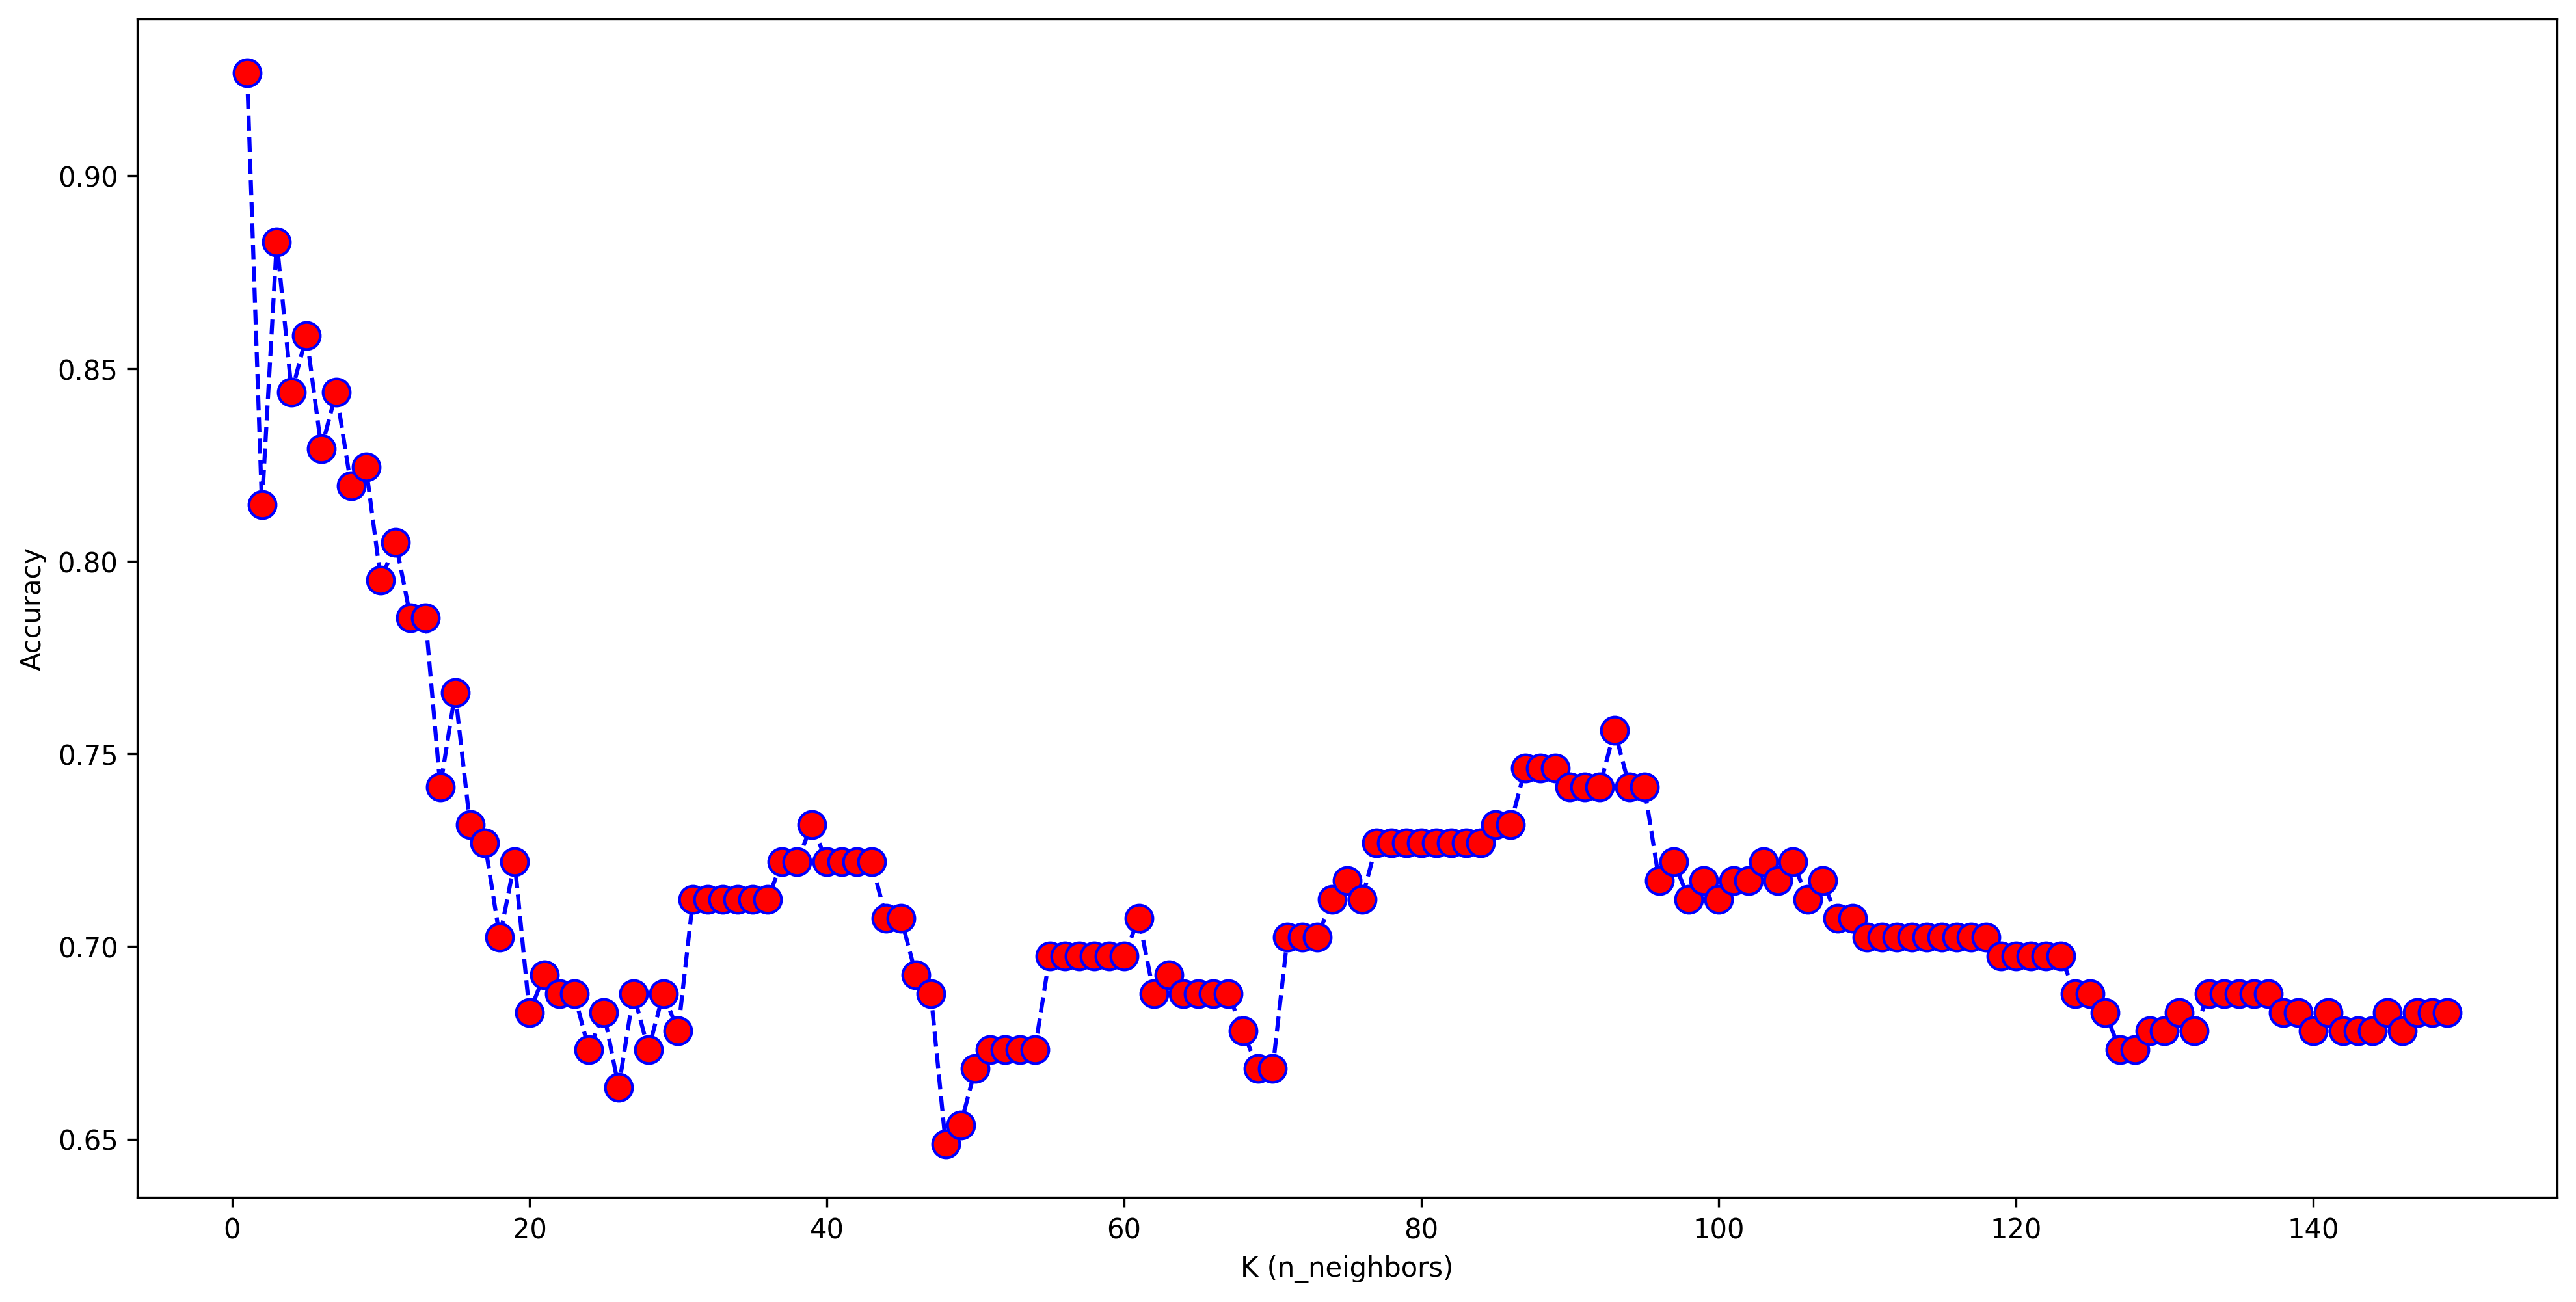

In [36]:
# featureScale(StandardScaler())
# featureScale(RobustScaler())
# featureScale(MinMaxScaler())


import numpy as np

acc = []
# Will take some time
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
for i in range(1,150):
    neigh = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski', p = 2).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
# plt.figure(figsize=(10,6))
plt.figure(figsize=(16, 8), dpi=300)
plt.plot(range(1,150),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
# plt.title('accuracy vs. K Value (n_neighbors)')
plt.xlabel('K (n_neighbors)')
plt.ylabel('Accuracy')
arr = pd.DataFrame(data=acc, columns={"acc"})
max=arr['acc'].max()
k =acc.index(max)+1
print(max)
print("Maximum accuracy:-",max,"at K =",k)

[[ 19   9]
 [  6 171]]
accuracy_score : 0.926829268292683
Accuracy: 90.66 %
Standard Deviation: 6.11 %
(0.9240487804878049, 0.926829268292683, 0.925065838576572, None)


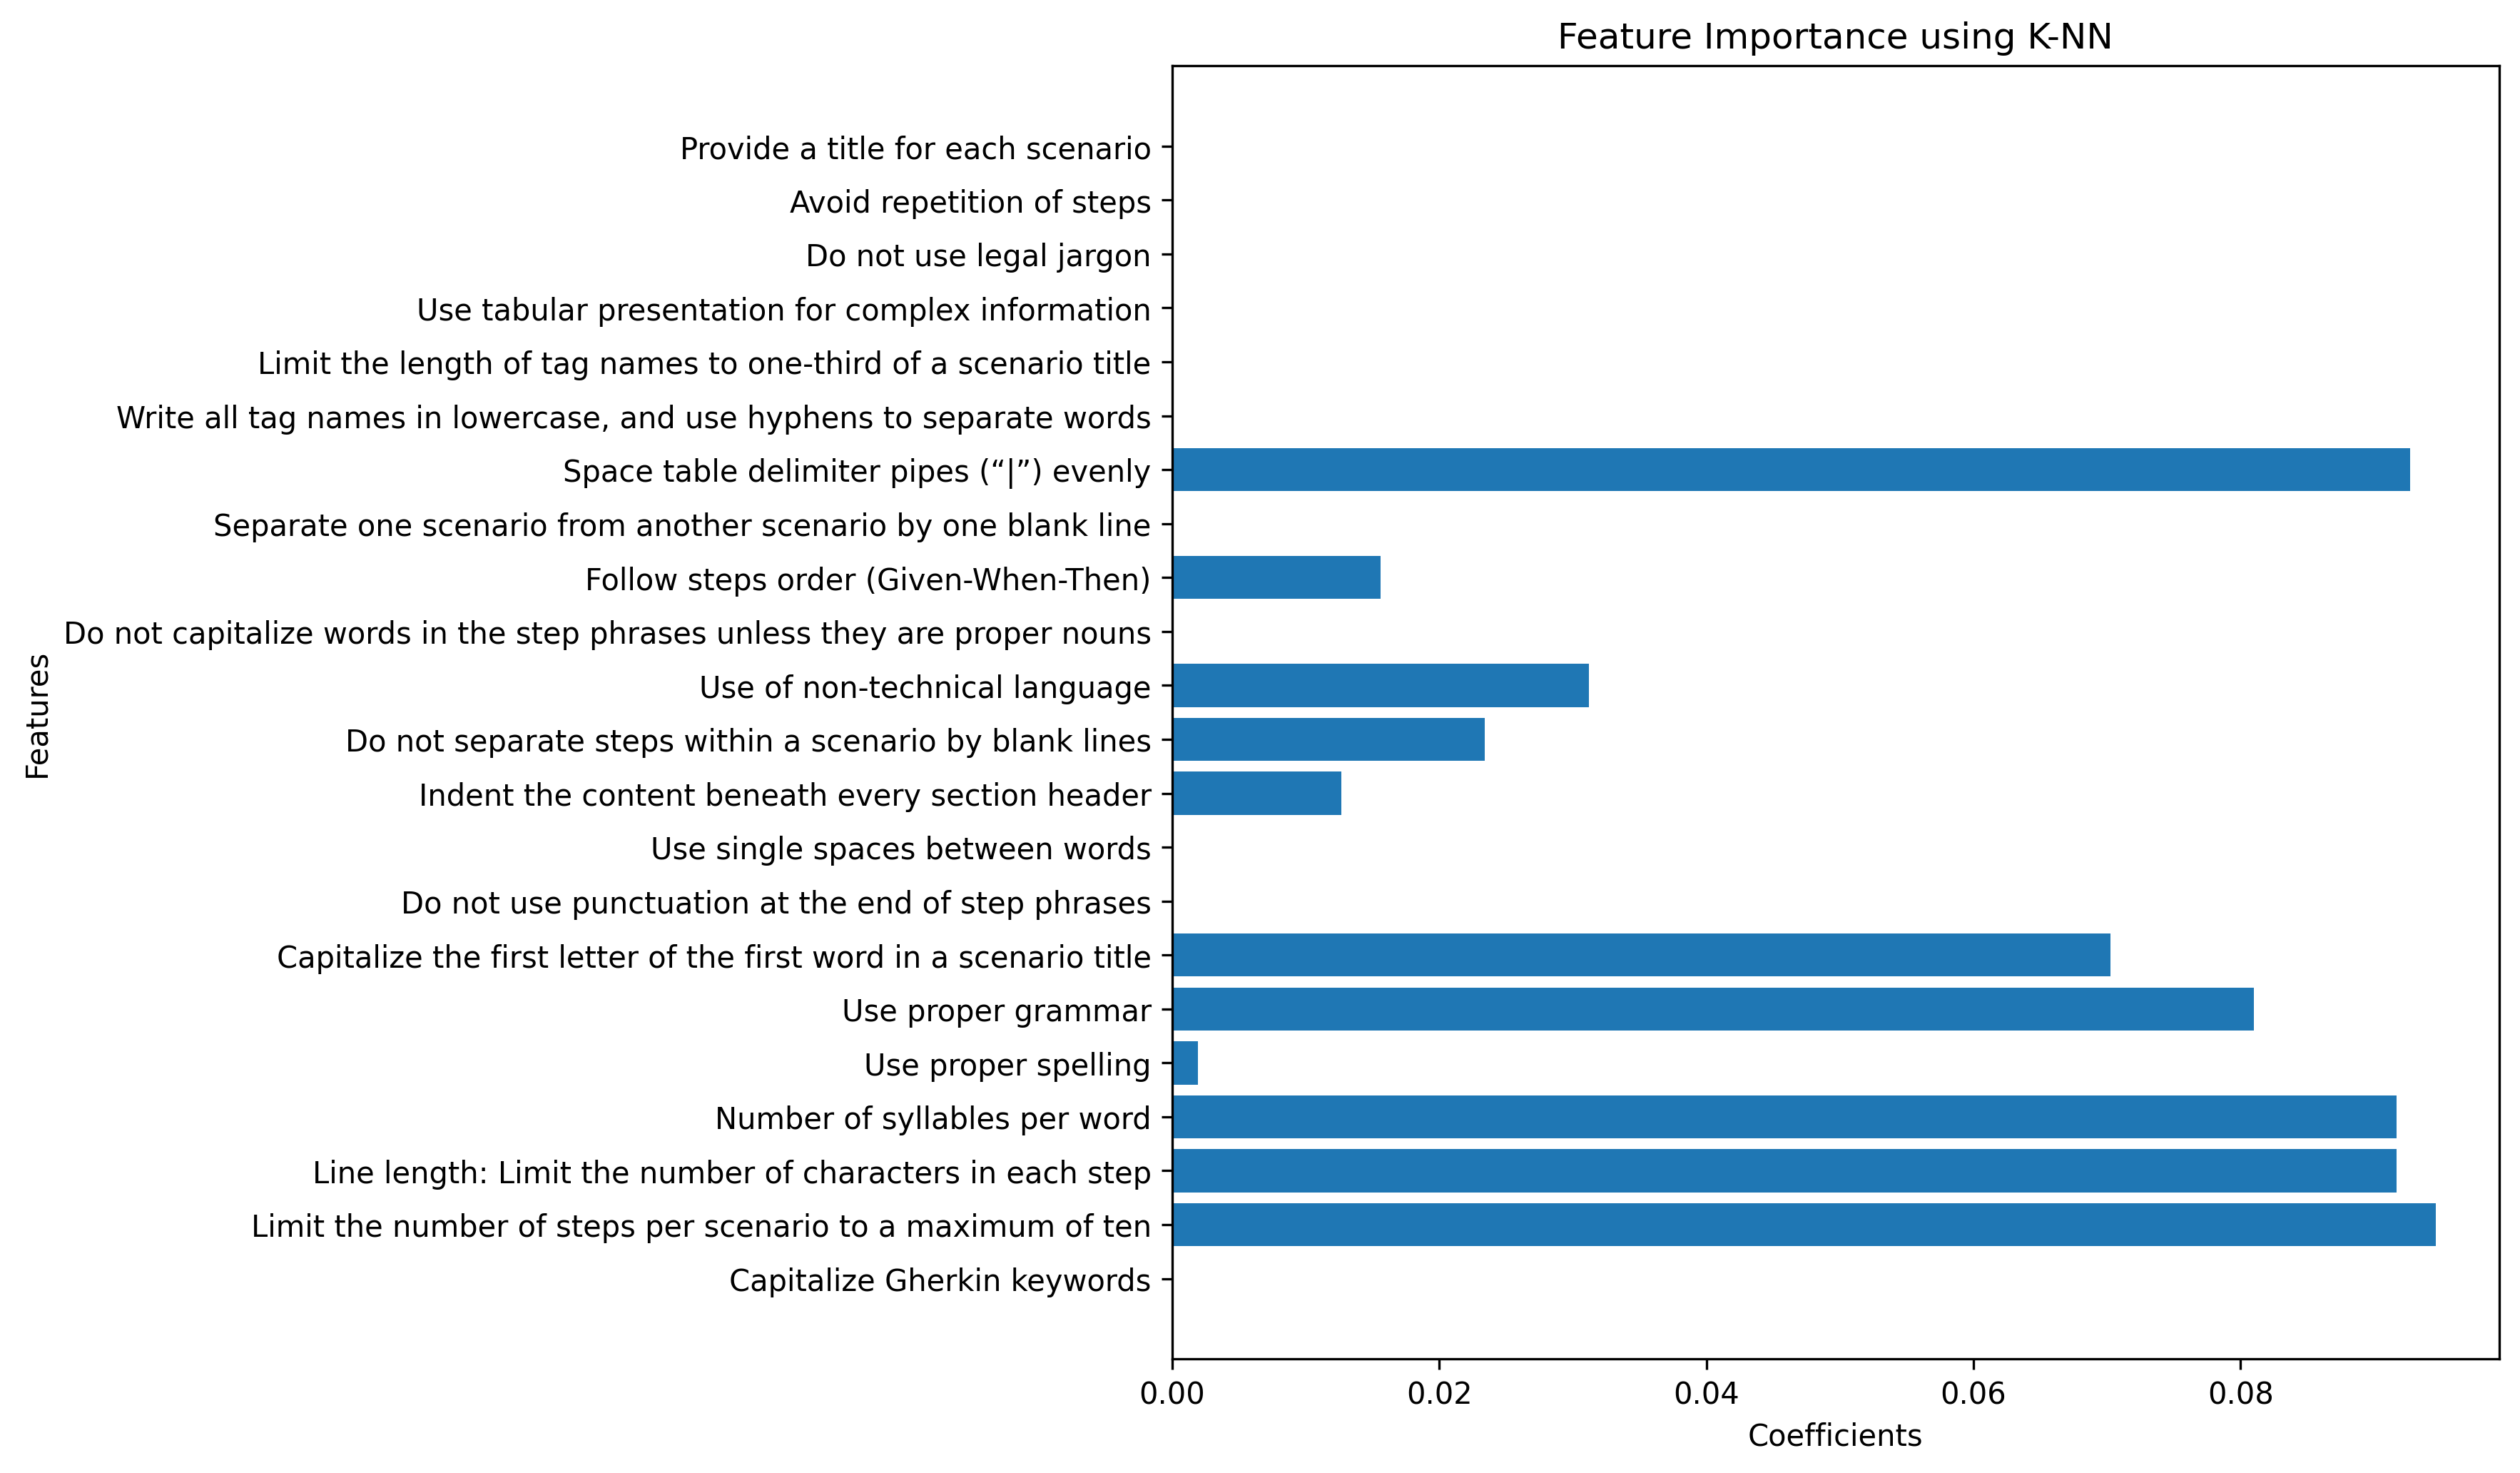

,Coefficient
Limit the number of steps per scenario to a maximum of ten,0.094634
Space table delimiter pipes (“|”) evenly,0.092683
Line length: Limit the number of characters in each step,0.091707
Number of syllables per word,0.091707
Use proper grammar,0.080976
Capitalize the first letter of the first word in a scenario title,0.070244
Use of non-technical language,0.031220
Do not separate steps within a scenario by blank lines,0.023415
Follow steps order (Given-When-Then),0.015610
Indent the content beneath every section header,0.012683


In [37]:
k=1
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('accuracy_score :',accuracy_score(y_test, y_pred))

print("=================")
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

print("=================")
from sklearn.metrics import precision_recall_fscore_support
k_nn=precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(k_nn)

print("=================")

imps = permutation_importance(classifier, X_test, y_test)
# print(imps.importances_mean)
importance = imps.importances_mean
features=dataset.columns
coef_dict = {}
for coef, feat in zip(importance,features):
    coef_dict[feat] = coef
#     print (feat,"#",coef_dict[feat])
coef_dict

plt.figure(figsize=(8, 8), dpi=300)
plt.title("Feature Importance using K-NN")
plt.ylabel("Features")
plt.xlabel("Coefficients")
plt.barh(*zip(*coef_dict.items()))
plt.savefig('KNN.png', dpi=300)

plt.show()


pd.DataFrame(importance, 
             dataset.columns[0:22], 
             columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)

## Training the Kernel SVM model on the Training set

In [38]:
from sklearn.svm import SVC
kernels = ['linear', 'rbf', 'poly']
# gammas = [0.010.1, 1, 10, 100]

In [39]:
classifier = SVC(kernel = kernels[1], random_state = 0)
classifier.fit(X_train, y_train)

## Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("=================")
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

print("=================")
from sklearn.metrics import precision_recall_fscore_support
k_svm=precision_recall_fscore_support(y_test, y_pred, average='weighted')
k_svm

[[ 19   9]
 [ 43 134]]
Accuracy: 78.98 %
Standard Deviation: 3.03 %


(0.8509306586411229, 0.7463414634146341, 0.7807791327913279, None)

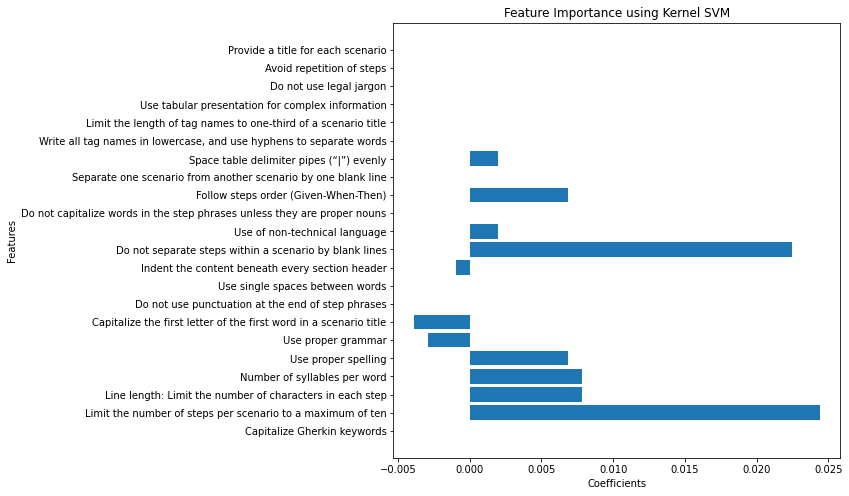

,coef
Limit the number of steps per scenario to a maximum of ten,0.024390
Do not separate steps within a scenario by blank lines,0.022439
Line length: Limit the number of characters in each step,0.007805
Number of syllables per word,0.007805
Use proper spelling,0.006829
Follow steps order (Given-When-Then),0.006829
Use of non-technical language,0.001951
Space table delimiter pipes (“|”) evenly,0.001951
Separate one scenario from another scenario by one blank line,0.000000
Avoid repetition of steps,0.000000


In [40]:
imps = permutation_importance(classifier, X_test, y_test)
# print(imps.importances_mean)
importance = imps.importances_mean
features=dataset.columns
coef_dict = {}
for coef, feat in zip(importance,features):
    coef_dict[feat] = coef
#     print (feat,"#",coef_dict[feat])
coef_dict

plt.figure(figsize=(8,8))
plt.title("Feature Importance using Kernel SVM")
plt.ylabel("Features")
plt.xlabel("Coefficients")
plt.barh(*zip(*coef_dict.items()))

plt.show()

pd.DataFrame(importance, 
             dataset.columns[0:22], 
             columns=['coef']).sort_values(by='coef', ascending=False)

## Training the Naive Bayes model on the Training set

In [41]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
classifier = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
classifier.fit(X_train, y_train)
print(classifier.best_estimator_)


from sklearn.metrics import classification_report
y_pred = classifier.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))
# print(classification_report(y_test, y_pred,target_names=['Less readable','Readable']))

print("=================")
y_train_pred = classifier.predict(X_train)
print('accuracy Training : %f' % accuracy_score(y_train_pred, y_train))


print('Training set score: {:.4f}'.format(classifier.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(classifier.score(X_test, y_test)))

import collections, numpy
value_counts=collections.Counter(y_test)
print(value_counts)
# y_test.value_counts()
null_accuracy = (107/(107+40))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

print("=================")
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

from sklearn.metrics import precision_recall_fscore_support
nb=precision_recall_fscore_support(y_test, y_pred, average='weighted')
nb

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.008111308307896872)
accuracy 0.6731707317073171
accuracy Training : 0.723464
Training set score: 0.7235
Test set score: 0.6732
Counter({1: 177, 0: 28})
Null accuracy score: 0.7279
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Accuracy: 71.37 %
Standard Deviation: 2.39 %


(0.8232709655863681, 0.6731707317073171, 0.7221809843783337, None)

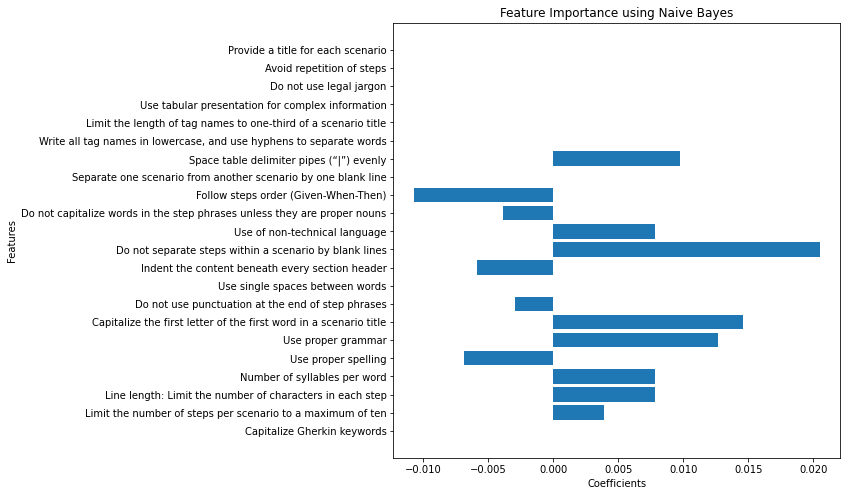

,coef
Do not separate steps within a scenario by blank lines,0.020488
Capitalize the first letter of the first word in a scenario title,0.014634
Use proper grammar,0.012683
Space table delimiter pipes (“|”) evenly,0.009756
Use of non-technical language,0.007805
Line length: Limit the number of characters in each step,0.007805
Number of syllables per word,0.007805
Limit the number of steps per scenario to a maximum of ten,0.003902
Separate one scenario from another scenario by one blank line,0.000000
Avoid repetition of steps,0.000000


In [42]:
imps = permutation_importance(classifier, X_test, y_test)
# print(imps.importances_mean)
importance = imps.importances_mean
features=dataset.columns
coef_dict = {}
for coef, feat in zip(importance,features):
    coef_dict[feat] = coef
#     print (feat,"#",coef_dict[feat])
coef_dict

plt.figure(figsize=(8,8))
plt.title("Feature Importance using Naive Bayes")
plt.ylabel("Features")
plt.xlabel("Coefficients")
plt.barh(*zip(*coef_dict.items()))

plt.show()
pd.DataFrame(importance, 
             dataset.columns[0:22], 
             columns=['coef']).sort_values(by='coef', ascending=False)

## Training the Random Forest Classification model on the Training set

best n_estimators is 18 with best acc 0.9024390243902439
[[ 15  13]
 [  7 170]]
[0.84722222 0.90972222 0.97202797 0.94405594 0.95104895 0.92307692
 0.92307692 0.94405594 0.97202797 0.95804196]
Accuracy: 93.44 %
Standard Deviation: 3.51 %
(0.8952055541419797, 0.9024390243902439, 0.89739837398374, None)


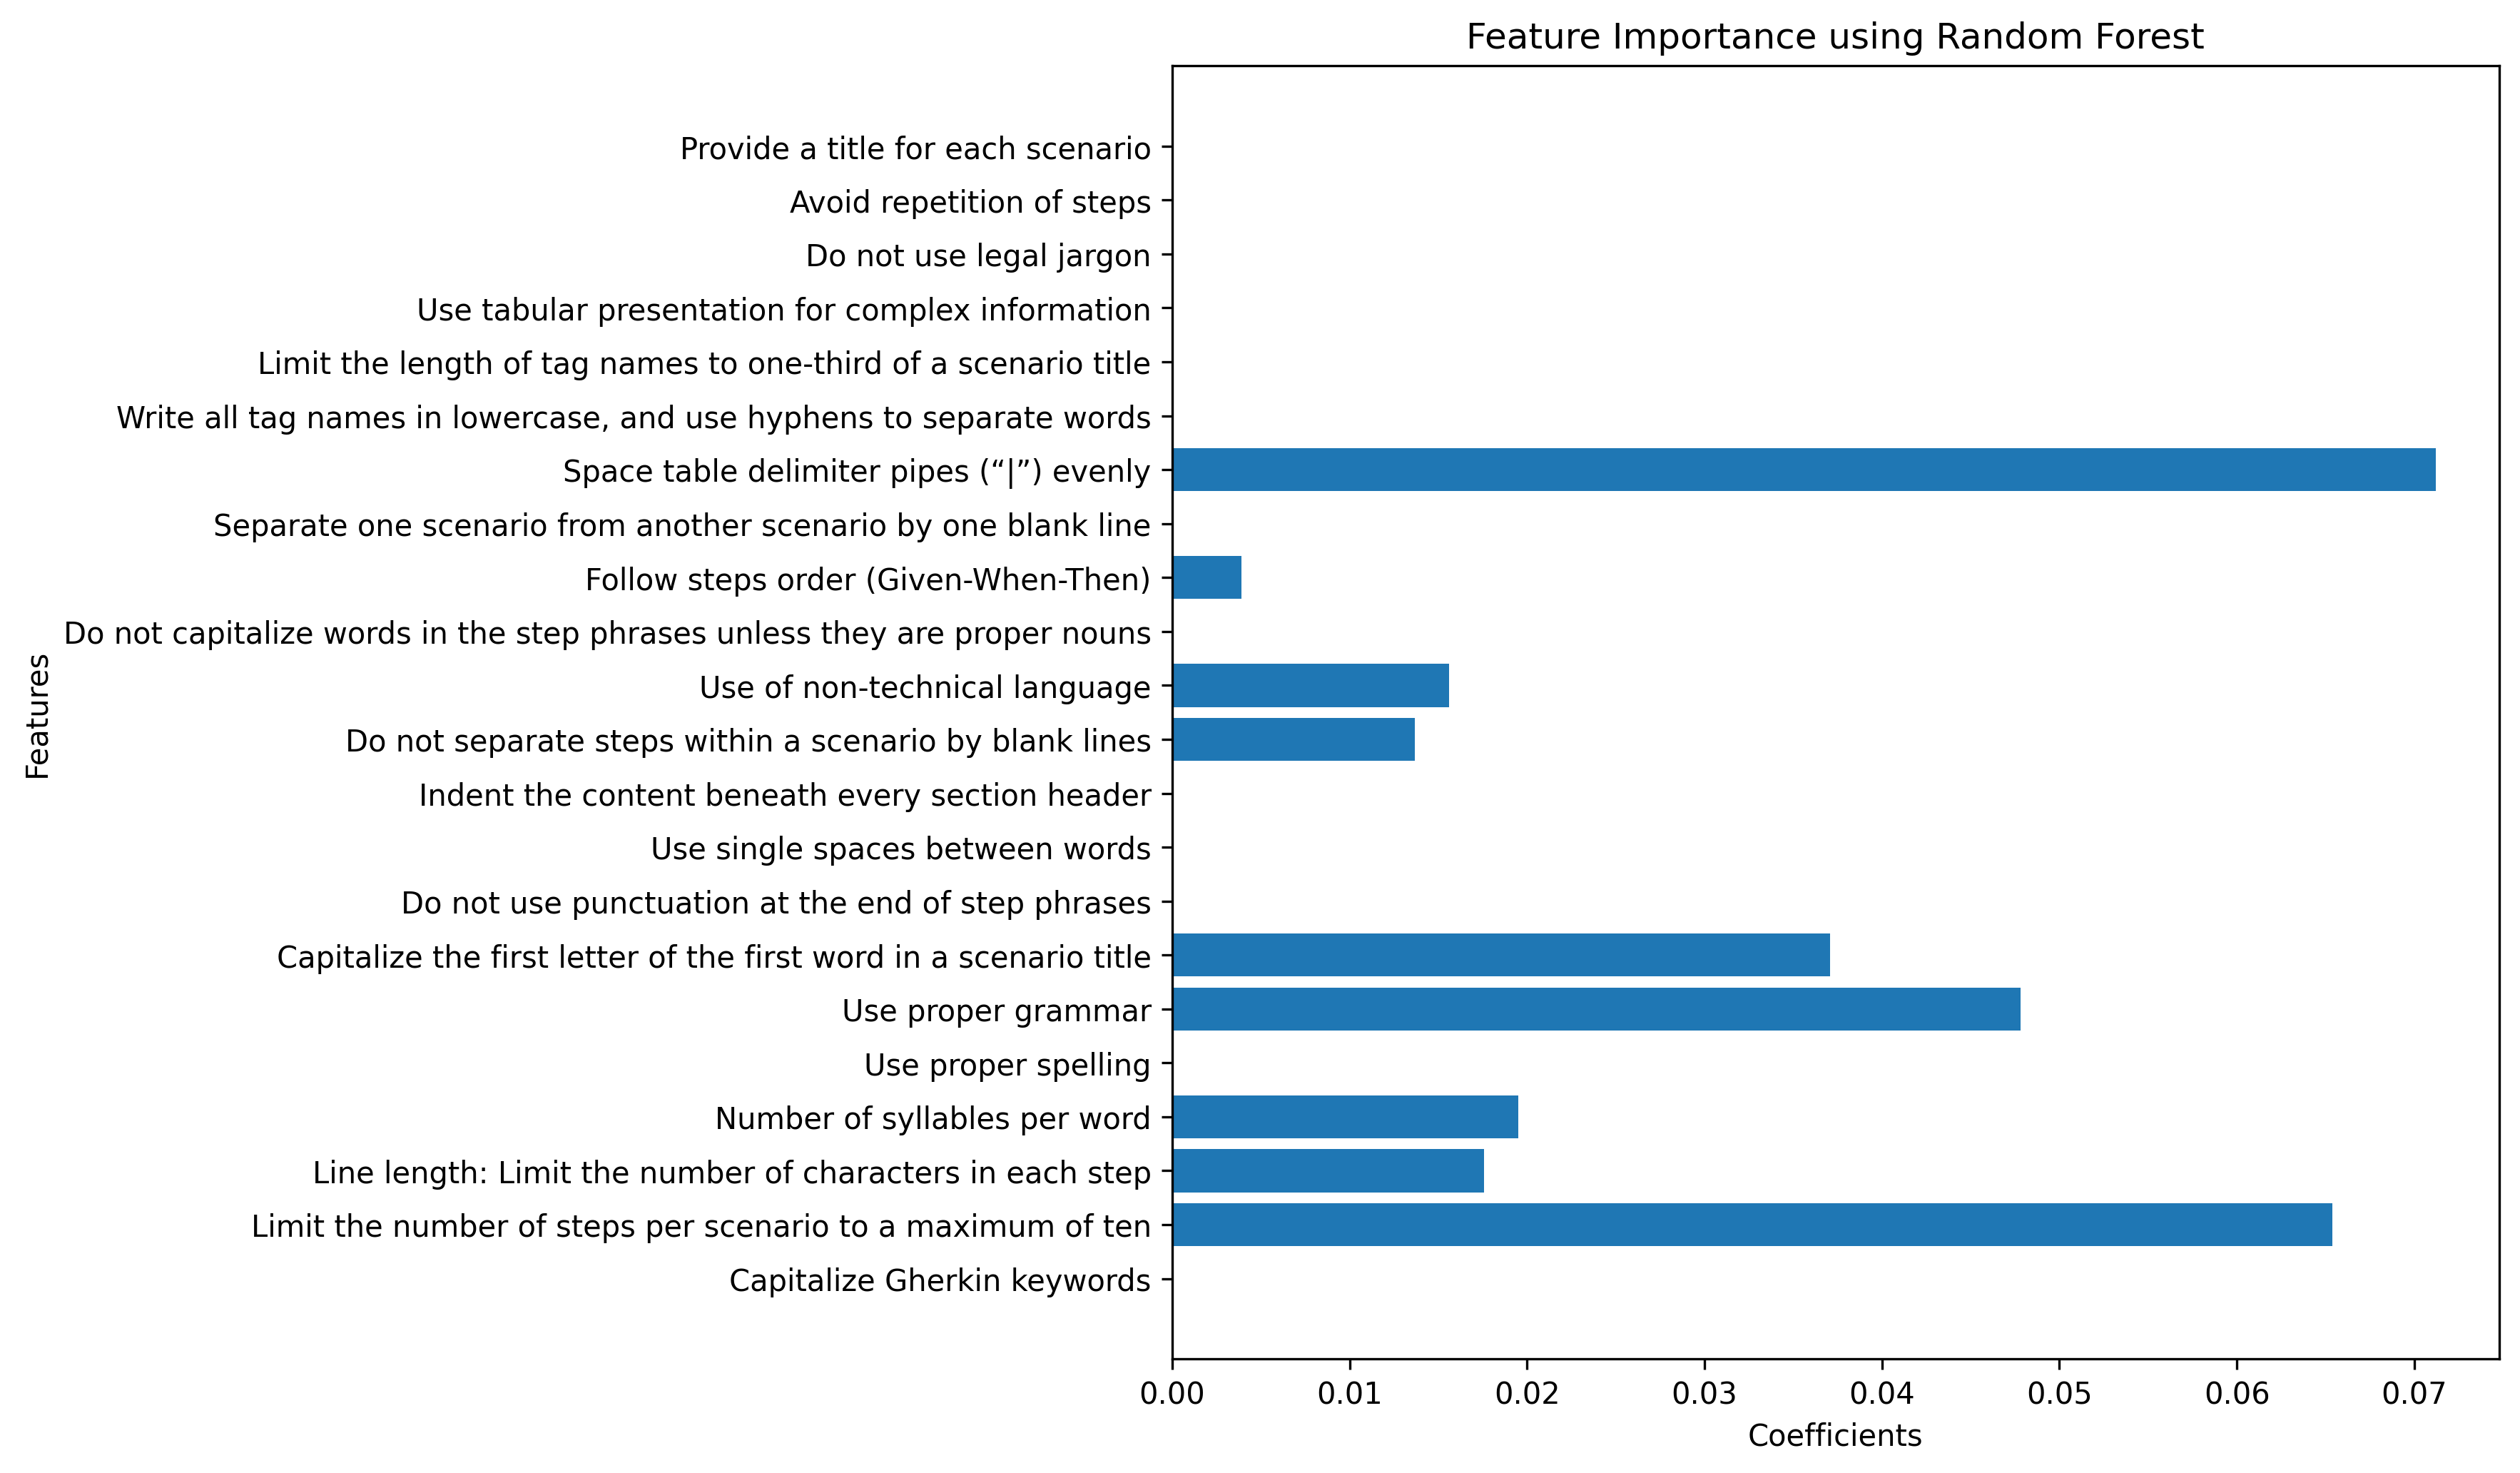

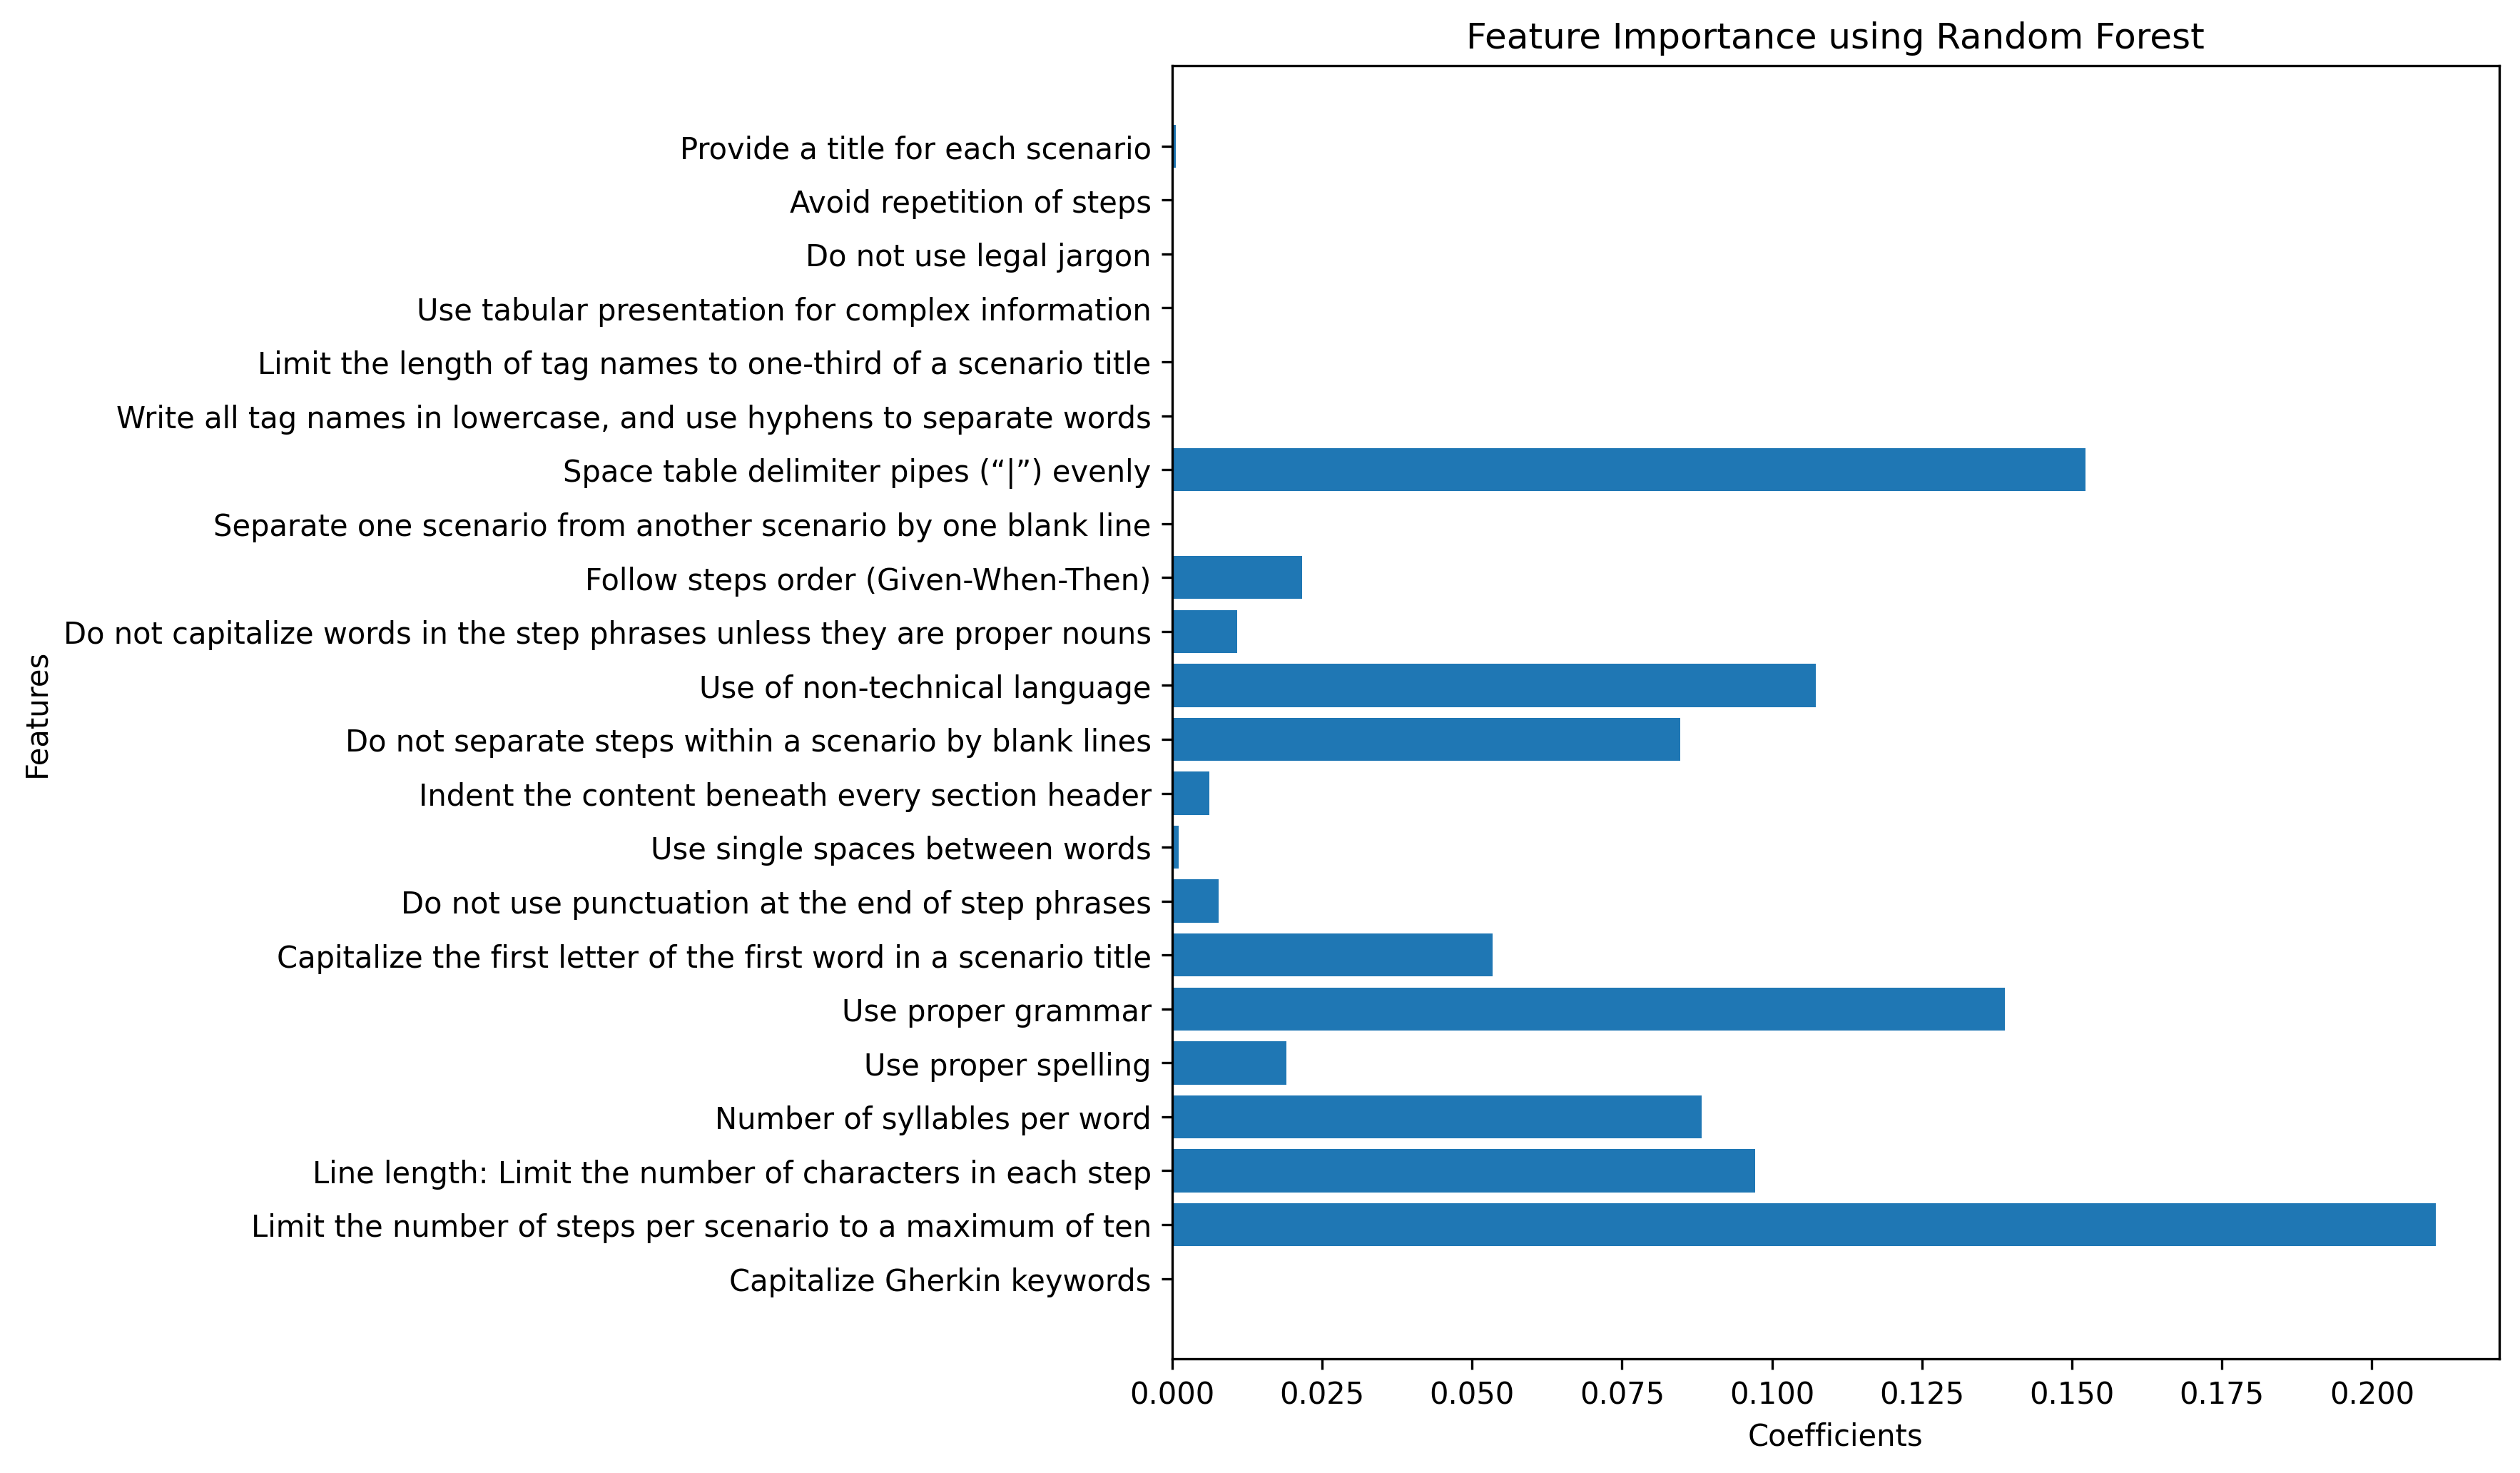

,coef
Limit the number of steps per scenario to a maximum of ten,0.210693
Space table delimiter pipes (“|”) evenly,0.152301
Use proper grammar,0.138863
Use of non-technical language,0.107361
Line length: Limit the number of characters in each step,0.097179
Number of syllables per word,0.088263
Do not separate steps within a scenario by blank lines,0.084748
Capitalize the first letter of the first word in a scenario title,0.053457
Follow steps order (Given-When-Then),0.021689
Use proper spelling,0.019056


In [43]:
from sklearn.ensemble import RandomForestClassifier
best_acc=0
best_n=1
for n in range(1,100):
    classifier = RandomForestClassifier(n_estimators = n, criterion = 'entropy', random_state = 1)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
#     print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

    from sklearn.metrics import confusion_matrix, accuracy_score
    cm = confusion_matrix(y_test, y_pred)
    acc=accuracy_score(y_test, y_pred)
    
#     print(n)
#     print(acc)
    if best_acc<acc:
        best_acc=acc
        best_n=n
        
print("best n_estimators is {} with best acc {}".format(best_n, best_acc))
classifier = RandomForestClassifier(n_estimators = best_n, criterion = 'entropy', random_state = 1)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc=accuracy_score(y_test, y_pred)

print("=================")
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print("=================")
from sklearn.metrics import precision_recall_fscore_support
rf=precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(rf)

print("=================")
imps = permutation_importance(classifier, X_test, y_test)
# print(imps.importances_mean)
importance = imps.importances_mean
features=dataset.columns
coef_dict = {}
for coef, feat in zip(importance,features):
    coef_dict[feat] = coef
#     print (feat,"#",coef_dict[feat])
coef_dict

plt.figure(figsize=(8, 8), dpi=300)
plt.title("Feature Importance using Random Forest")
plt.ylabel("Features")
plt.xlabel("Coefficients")
plt.barh(*zip(*coef_dict.items()))
# plt.savefig('DT.png', dpi=300)
plt.show()

print("=================")
importance = classifier.feature_importances_
features=dataset.columns
coef_dict = {}
for coef, feat in zip(importance,features):
    coef_dict[feat] = coef
#     print (feat,"#",coef_dict[feat])
coef_dict

plt.figure(figsize=(8, 8), dpi=300)
plt.title("Feature Importance using Random Forest")
plt.ylabel("Features")
plt.xlabel("Coefficients")
plt.barh(*zip(*coef_dict.items()))
# plt.savefig('DT.png', dpi=300)
plt.show()

pd.DataFrame(importance, 
             dataset.columns[0:22], 
             columns=['coef']).sort_values(by='coef', ascending=False)

## Training the SVM model on the Training set

/usr/local/Cellar/jupyterlab/3.3.0/libexec/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/Cellar/jupyterlab/3.3.0/libexec/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/Cellar/jupyterlab/3.3.0/libexec/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/Cellar/jupyterlab/3.3.0/libexec/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/Cellar/jupyterlab/3.3.0/libexec/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


best C is 1 with best acc 0.6634146341463415
[[ 18  10]
 [ 59 118]]
Accuracy: 70.60 %
Standard Deviation: 2.50 %
(0.8278894124168514, 0.6634146341463415, 0.7149140343862453, None)


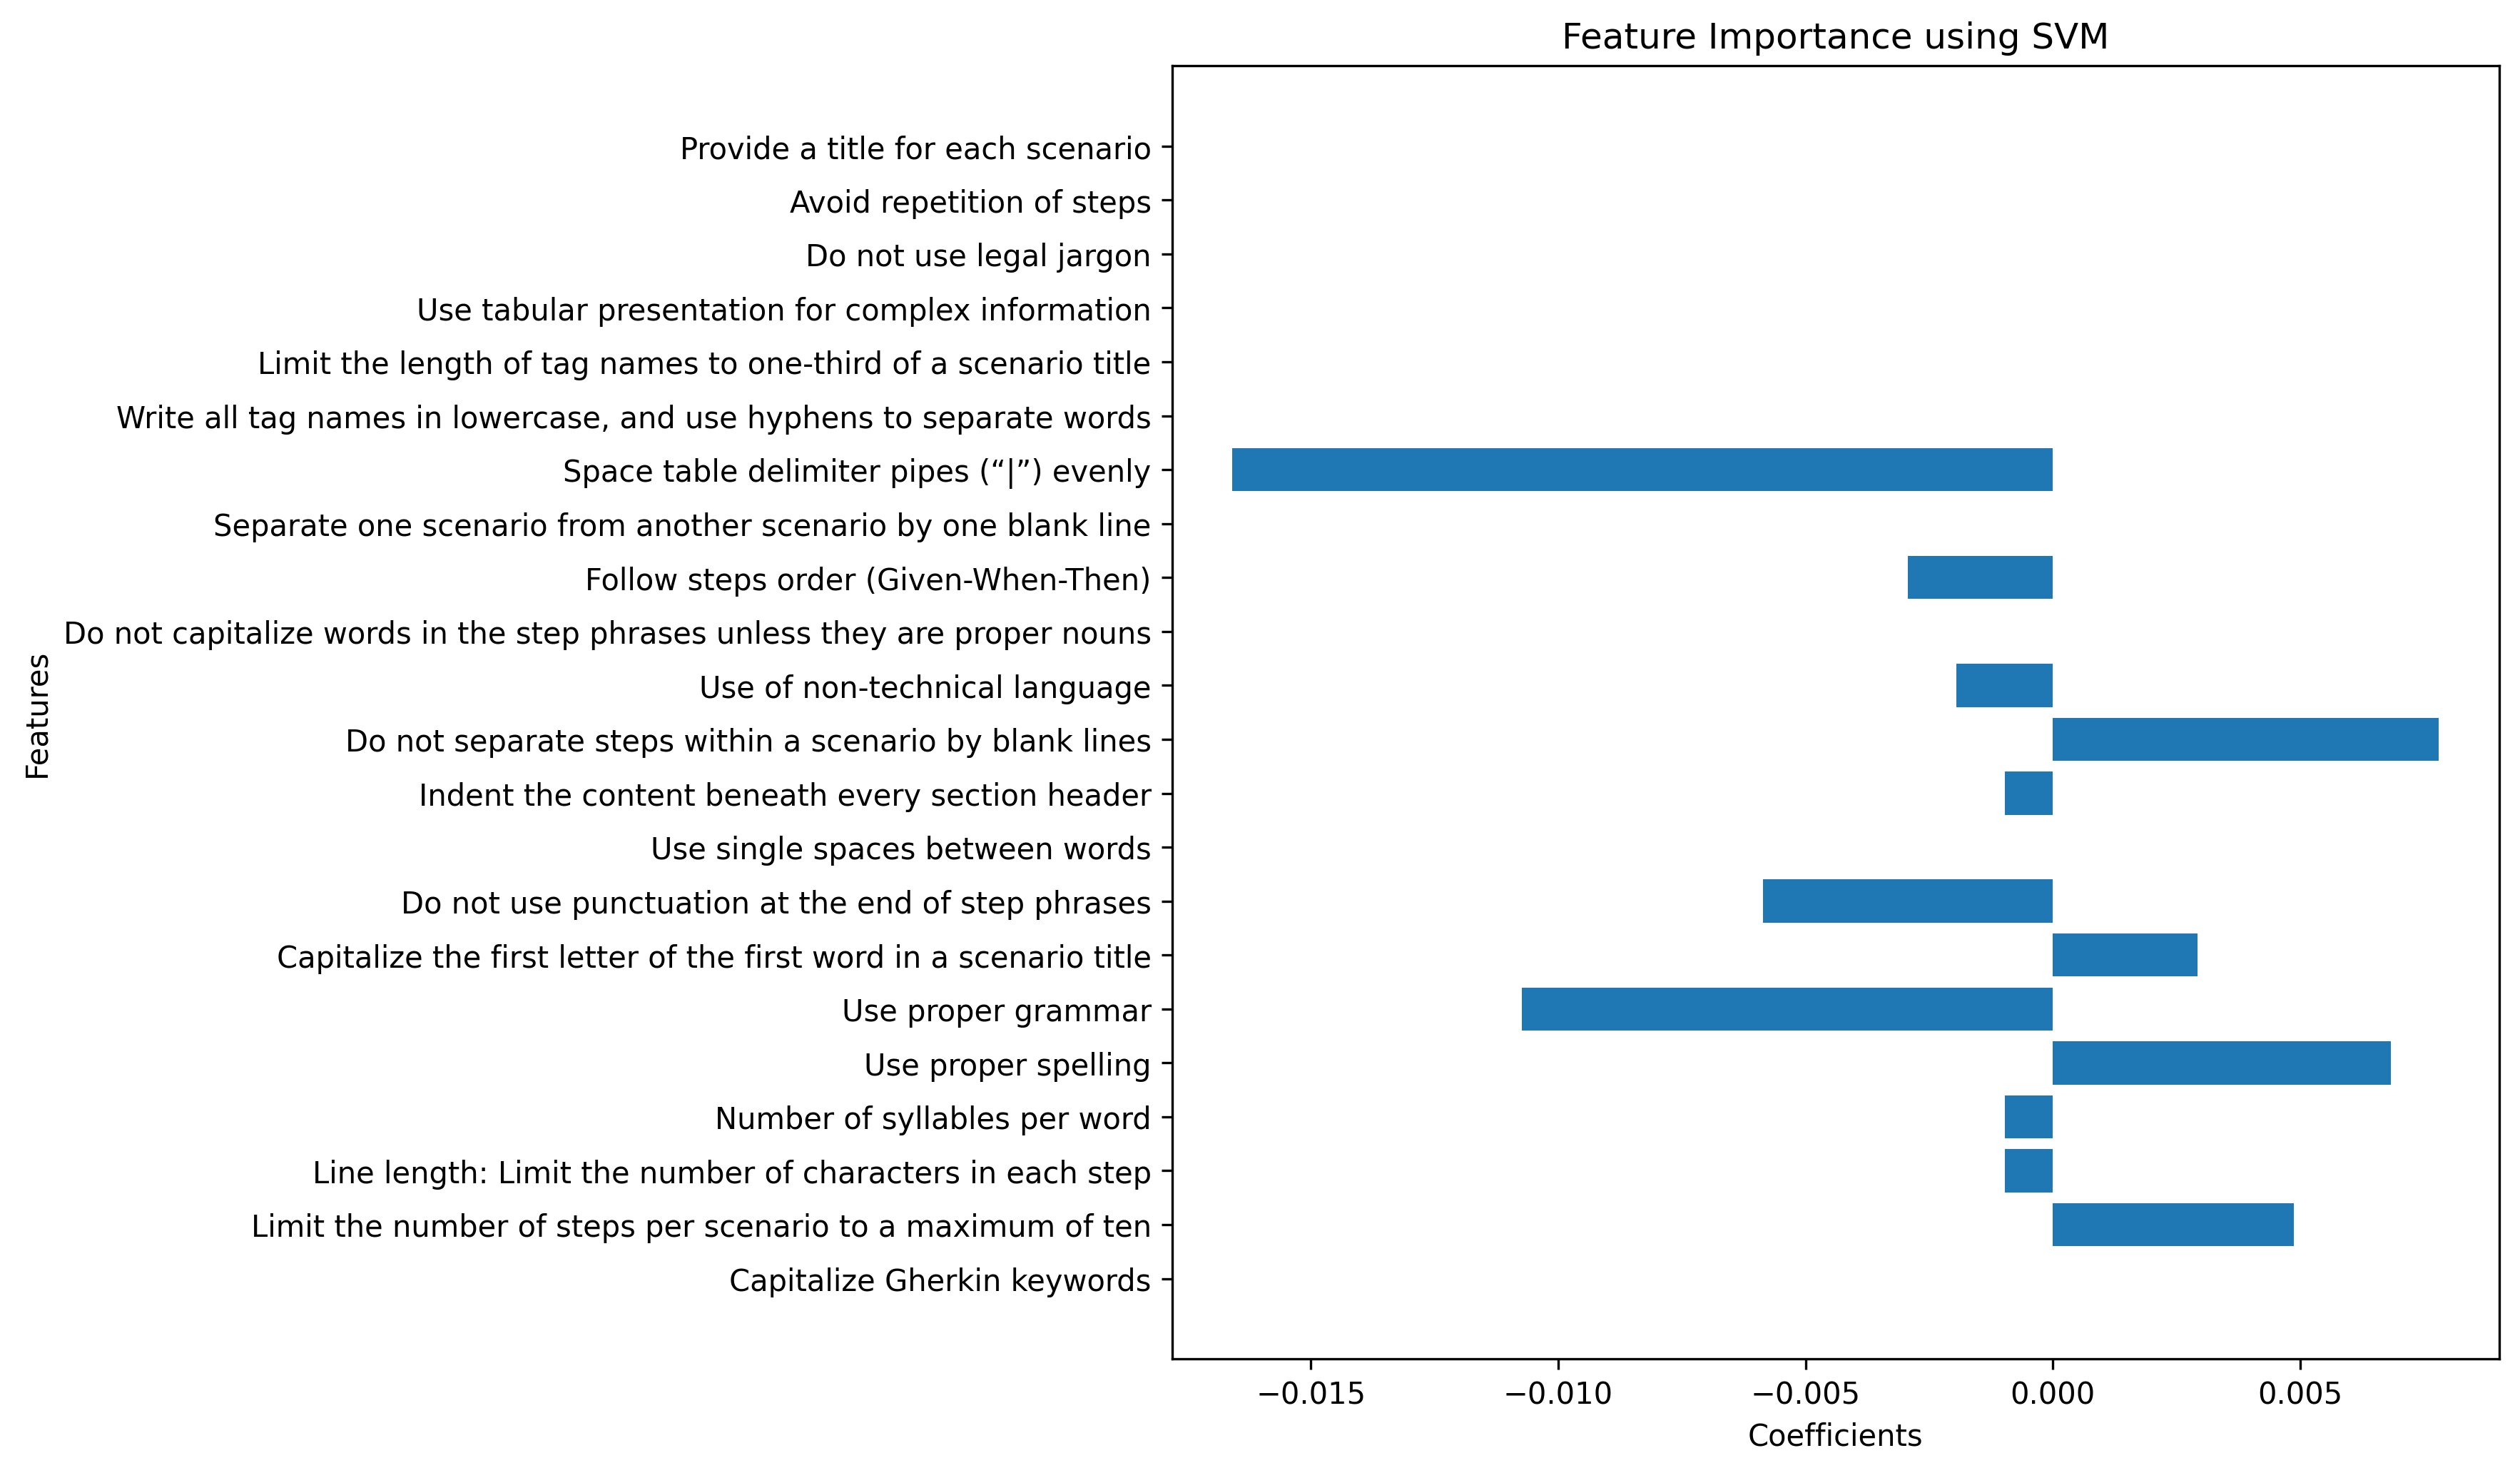

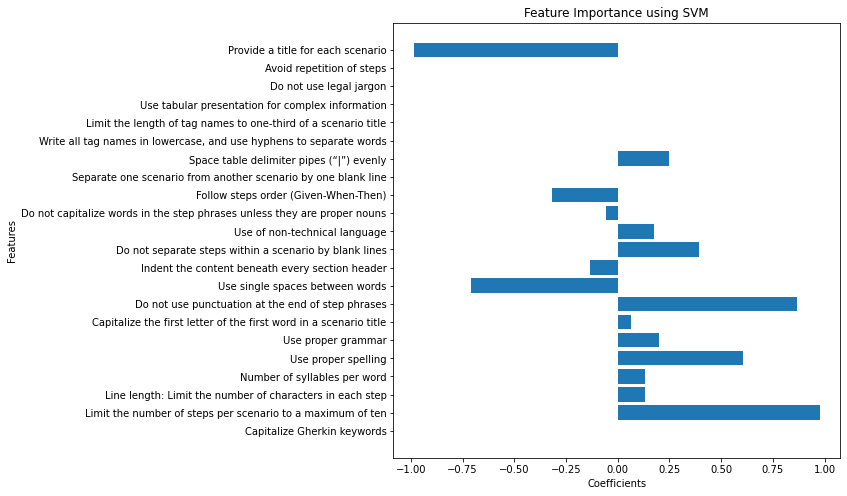

,coef
Limit the number of steps per scenario to a maximum of ten,0.975721
Do not use punctuation at the end of step phrases,0.866306
Use proper spelling,0.604684
Do not separate steps within a scenario by blank lines,0.392759
Space table delimiter pipes (“|”) evenly,0.249762
Use proper grammar,0.198051
Use of non-technical language,0.175744
Line length: Limit the number of characters in each step,0.130407
Number of syllables per word,0.130407
Capitalize the first letter of the first word in a scenario title,0.062719


In [44]:
from sklearn.svm import LinearSVC
best_C=1
best_acc=0
for c in range(1,10):
    classifier = LinearSVC(C=c, random_state = 0)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
    # print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

    from sklearn.metrics import confusion_matrix, accuracy_score
    cm = confusion_matrix(y_test, y_pred)
    acc=accuracy_score(y_test, y_pred)

    if best_acc<acc:
        best_acc=acc
        best_n=n
        
print("best C is {} with best acc {}".format(best_C, best_acc))

classifier = LinearSVC(C=best_C, random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

print("=================")
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

print("=================")
from sklearn.metrics import precision_recall_fscore_support
svm=precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(svm)

print("=================")
imps = permutation_importance(classifier, X_test, y_test)
# print(imps.importances_mean)
importance = imps.importances_mean
features=dataset.columns
coef_dict = {}
for coef, feat in zip(importance,features):
    coef_dict[feat] = coef
#     print (feat,"#",coef_dict[feat])
coef_dict

plt.figure(figsize=(8, 8), dpi=300)
plt.title("Feature Importance using SVM")
plt.ylabel("Features")
plt.xlabel("Coefficients")
plt.barh(*zip(*coef_dict.items()))
# plt.savefig('DT.png', dpi=300)
plt.show()

print("=================")

importance = classifier.coef_[0]
features=dataset.columns
coef_dict = {}
for coef, feat in zip(importance,features):
    coef_dict[feat] = coef
#     print (feat,"#",coef_dict[feat])
coef_dict

plt.figure(figsize=(8,8))
plt.title("Feature Importance using SVM")
plt.ylabel("Features")
plt.xlabel("Coefficients")
plt.barh(*zip(*coef_dict.items()))

plt.show()

pd.DataFrame(importance, 
             dataset.columns[0:22], 
             columns=['coef']).sort_values(by='coef', ascending=False)

## Training the Logistic Regression model on the Training set

[[ 18  10]
 [ 57 120]]
Accuracy: 70.32 %
Standard Deviation: 2.57 %
(0.8297786116322702, 0.6731707317073171, 0.7227206988872014, None)


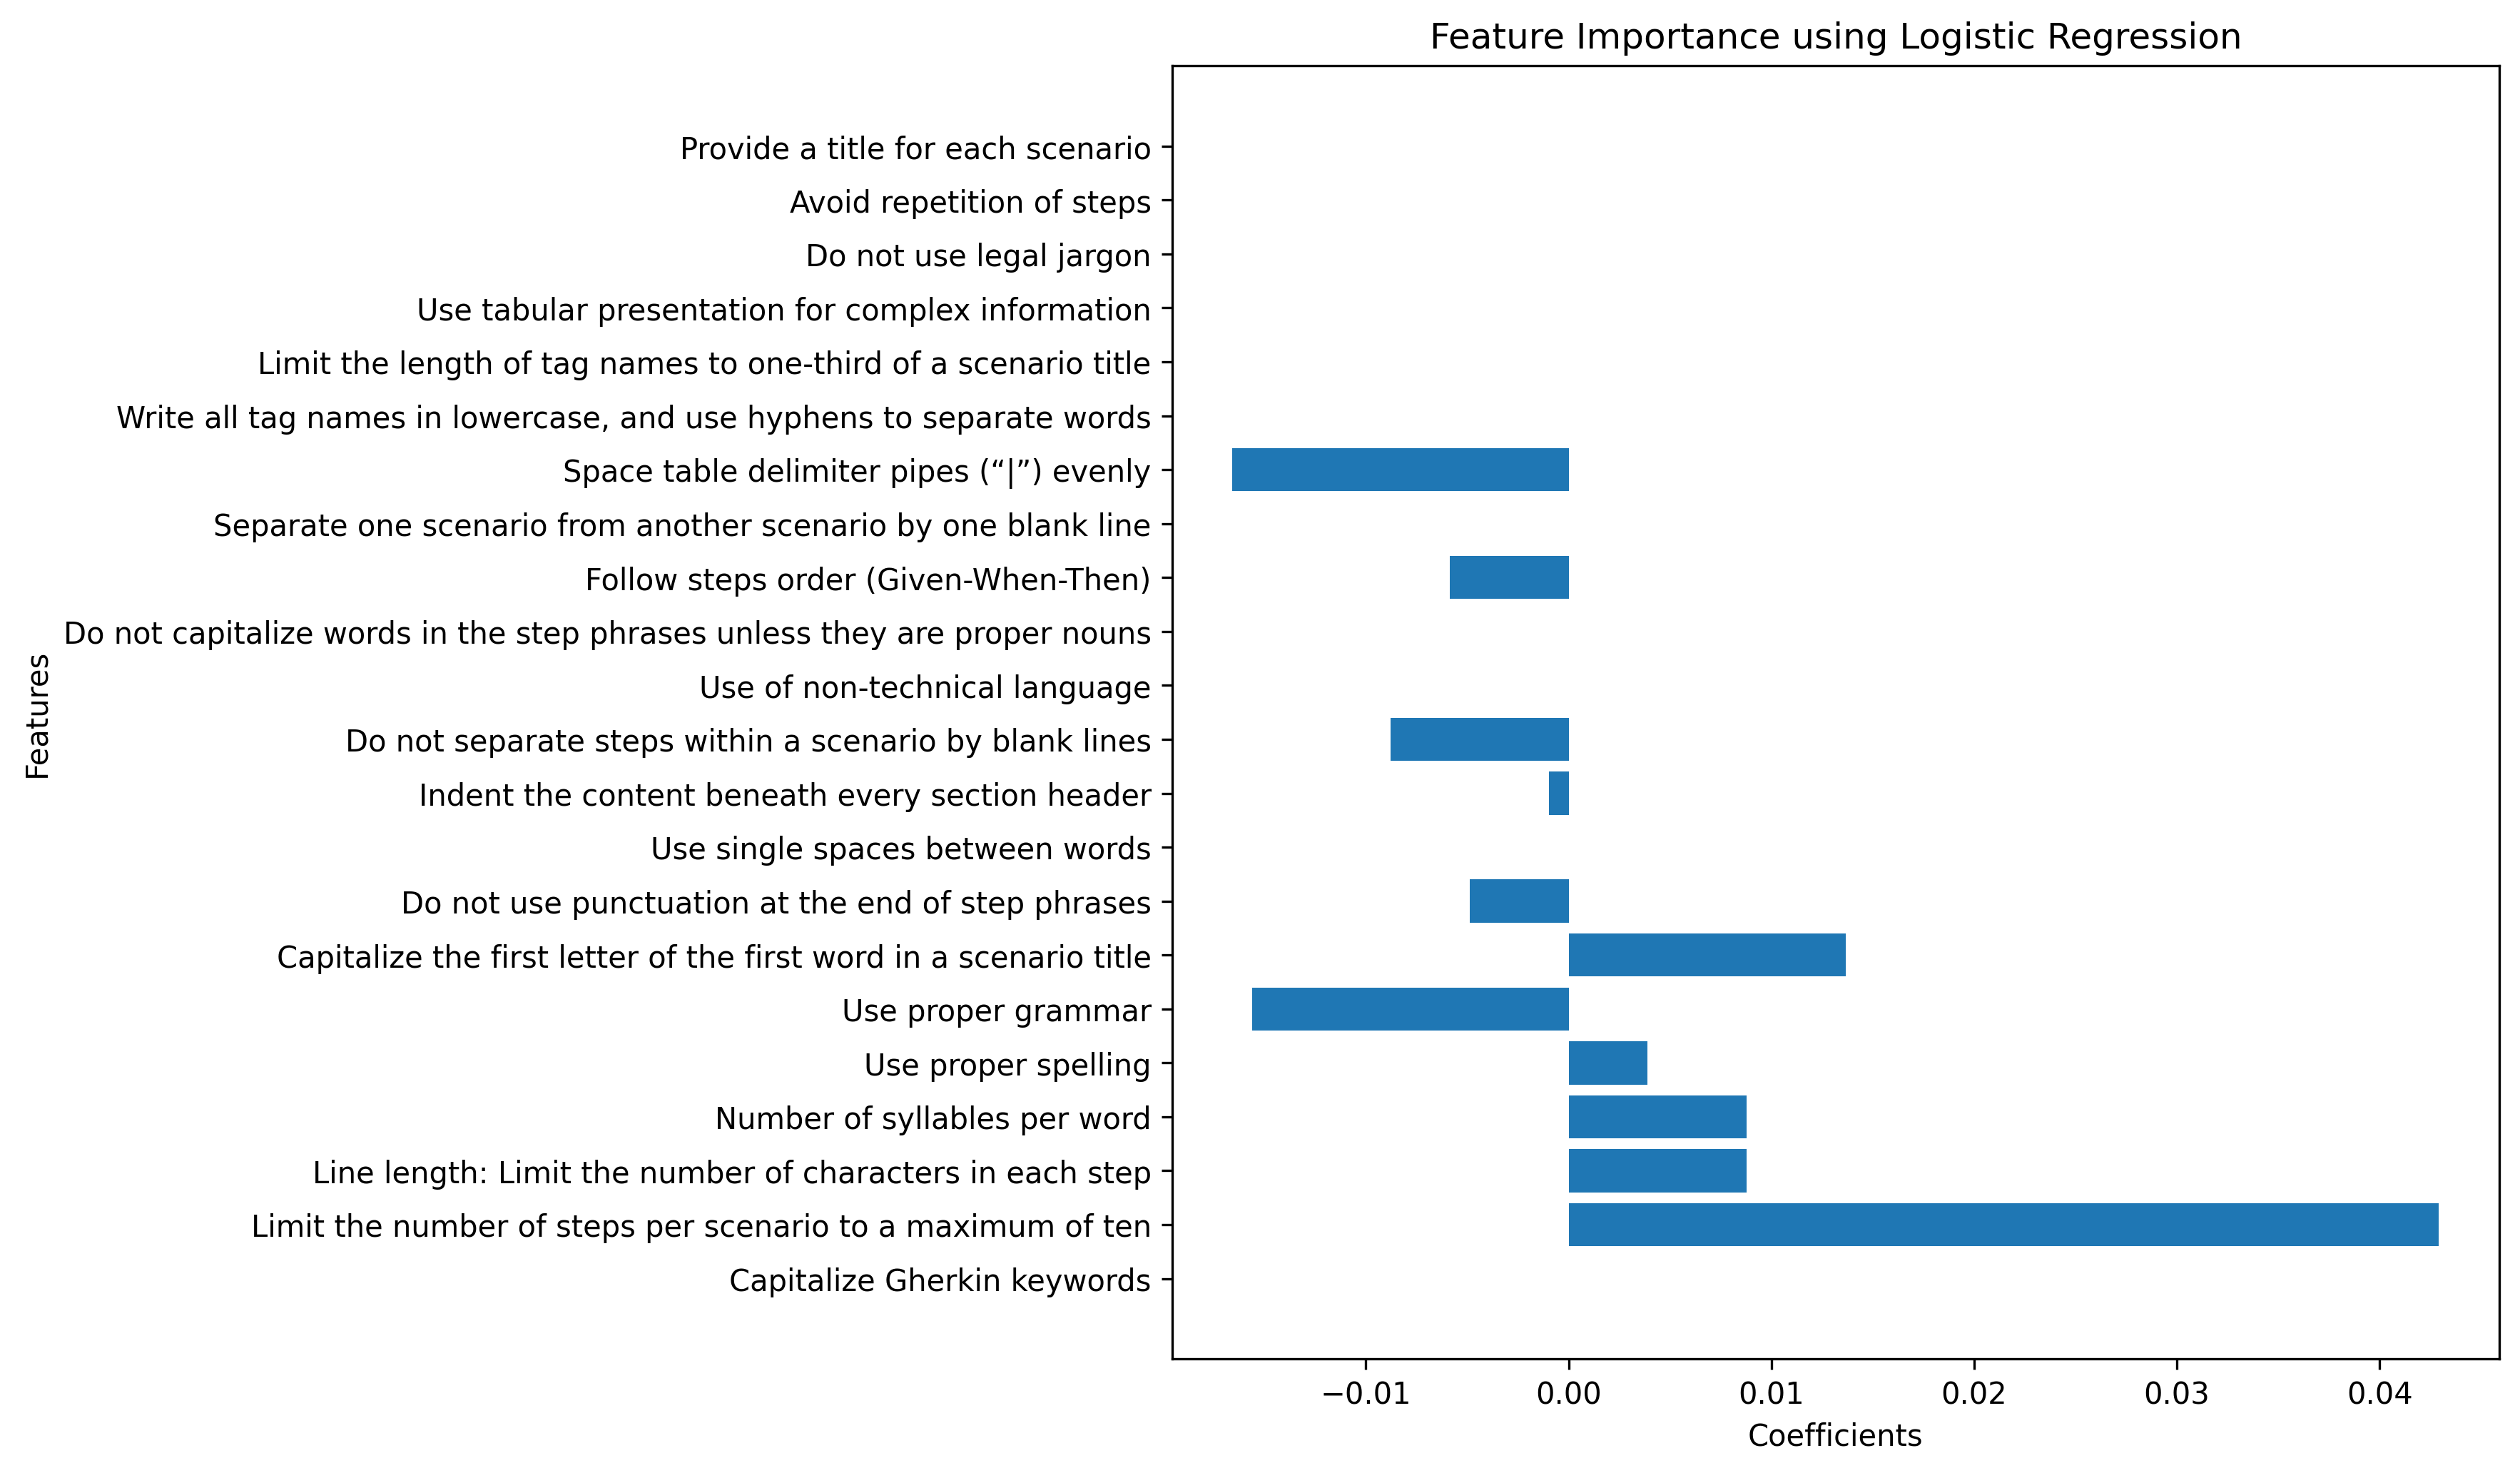

,coef
Limit the number of steps per scenario to a maximum of ten,4.292683e-02
Capitalize the first letter of the first word in a scenario title,1.365854e-02
Line length: Limit the number of characters in each step,8.780488e-03
Number of syllables per word,8.780488e-03
Use proper spelling,3.902439e-03
Use of non-technical language,2.220446e-17
Separate one scenario from another scenario by one blank line,0.000000e+00
Avoid repetition of steps,0.000000e+00
Do not use legal jargon,0.000000e+00
Use tabular presentation for complex information,0.000000e+00


In [45]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0,class_weight='balanced')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

print("=================")
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

print("=================")
from sklearn.metrics import precision_recall_fscore_support
l_regression=precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(l_regression)

print("=================")

imps = permutation_importance(classifier, X_test, y_test)
# print(imps.importances_mean)
importance = imps.importances_mean
features=dataset.columns
coef_dict = {}
for coef, feat in zip(importance,features):
    coef_dict[feat] = coef
#     print (feat,"#",coef_dict[feat])
coef_dict

plt.figure(figsize=(8, 8), dpi=300)
plt.title("Feature Importance using Logistic Regression")
plt.ylabel("Features")
plt.xlabel("Coefficients")
plt.barh(*zip(*coef_dict.items()))
# plt.savefig('DT.png', dpi=300)
plt.show()

print("=================")

# importance = classifier.coef_[0]
# features=dataset.columns
# coef_dict = {}
# for coef, feat in zip(importance,features):
#     coef_dict[feat] = coef
# #     print (feat,"#",coef_dict[feat])
# coef_dict


# plt.figure(figsize=(8, 8), dpi=300)
# plt.title("Feature Importance using Logistic Regression")
# plt.ylabel("Features")
# plt.xlabel("Coefficients")
# plt.barh(*zip(*coef_dict.items()))

# plt.show()

print("=================")
pd.DataFrame(importance, 
             dataset.columns[0:22], 
             columns=['coef']).sort_values(by='coef', ascending=False)


## Training the Multinomial Naive Bayes model on the Training set

In [46]:


## Training the Multinomial Naive Bayes Classification model on the Training set
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(X_train, y_train)

## Predicting the Test Xs using Multinomial Naive Bayes trained classifier
from sklearn.metrics import classification_report
y_pred = classifier.predict(X_test)

## Model Evaluation -confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=['Less readable','Readable']))

print("=================")
## Model Evaluation -precision, recall and fscore
from sklearn.metrics import precision_recall_fscore_support
Mult_NB=precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(Mult_NB)

print("=================")
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

print("=================")

"""
importance = classifier.coef_[0]
features=dataset.columns
coef_dict = {}
for coef, feat in zip(importance,features):
    coef_dict[feat] = coef
#     print (feat,"#",coef_dict[feat])
coef_dict


plt.figure(figsize=(8, 8), dpi=300)
plt.title("Feature Importance using Logistic Regression")
plt.ylabel("Features")
plt.xlabel("Coefficients")
plt.barh(*zip(*coef_dict.items()))

plt.show()


print("=================")
pd.DataFrame(importance, 
             dataset.columns[0:22], 
             columns=['coef']).sort_values(by='coef', ascending=False)
             

"""

[[ 17  11]
 [ 60 117]]
accuracy 0.6536585365853659
               precision    recall  f1-score   support

Less readable       0.22      0.61      0.32        28
     Readable       0.91      0.66      0.77       177

     accuracy                           0.65       205
    macro avg       0.57      0.63      0.55       205
 weighted avg       0.82      0.65      0.71       205

(0.8193701496674058, 0.6536585365853659, 0.7066506730641077, None)
Accuracy: 64.24 %
Standard Deviation: 3.59 %


'\nimportance = classifier.coef_[0]\nfeatures=dataset.columns\ncoef_dict = {}\nfor coef, feat in zip(importance,features):\n    coef_dict[feat] = coef\n#     print (feat,"#",coef_dict[feat])\ncoef_dict\n\n\nplt.figure(figsize=(8, 8), dpi=300)\nplt.title("Feature Importance using Logistic Regression")\nplt.ylabel("Features")\nplt.xlabel("Coefficients")\nplt.barh(*zip(*coef_dict.items()))\n\nplt.show()\n\n\nprint("=================")\npd.DataFrame(importance, \n             dataset.columns[0:22], \n             columns=[\'coef\']).sort_values(by=\'coef\', ascending=False)\n             \n\n'

## Training the Decision Tree Classification model on the Training set

[[ 15  13]
 [ 12 165]]
Accuracy: 92.81 %
Standard Deviation: 3.25 %
(0.8762370207971744, 0.8780487804878049, 0.8771118953186972, None)


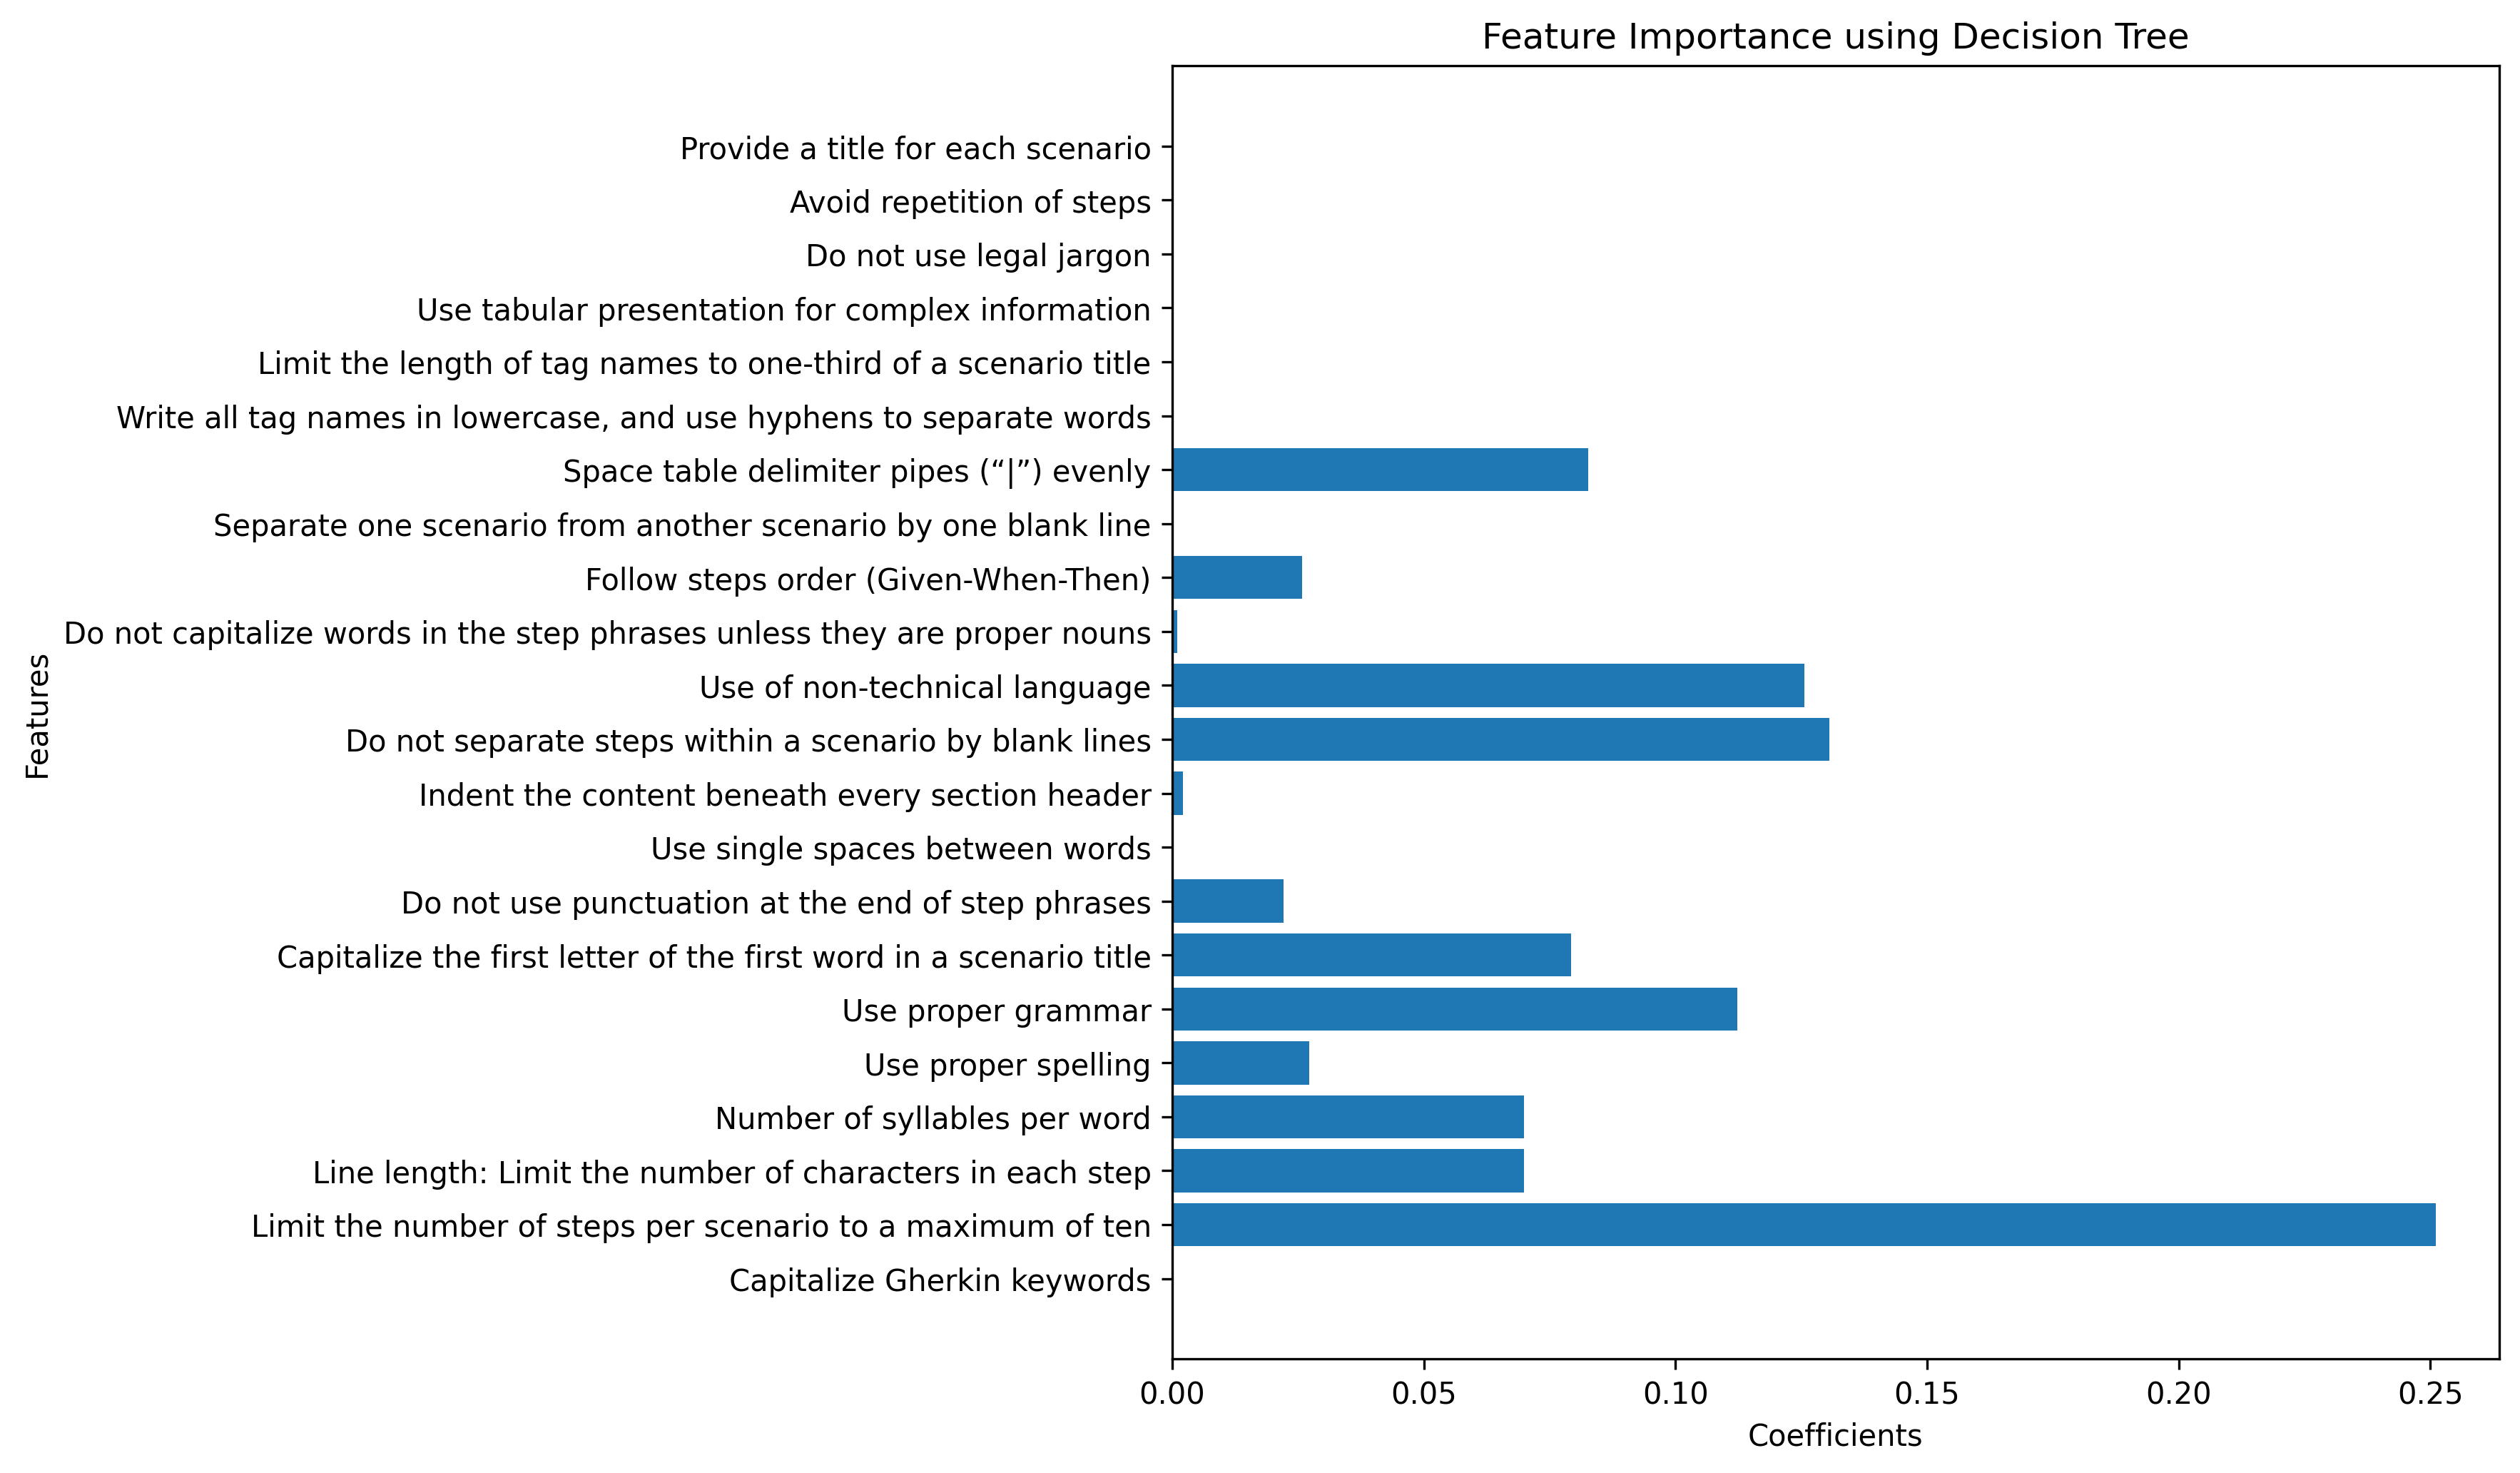

,coef
Limit the number of steps per scenario to a maximum of ten,0.251101
Do not separate steps within a scenario by blank lines,0.130600
Use of non-technical language,0.125598
Use proper grammar,0.112321
Space table delimiter pipes (“|”) evenly,0.082661
Capitalize the first letter of the first word in a scenario title,0.079222
Number of syllables per word,0.069936
Line length: Limit the number of characters in each step,0.069908
Use proper spelling,0.027277
Follow steps order (Given-When-Then),0.025875


In [47]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
# clf = LogisticRegression(random_state=0, class_weight='balanced')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

print("=================")

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

print("=================")
from sklearn.metrics import precision_recall_fscore_support
dt=precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(dt)

print("=================")

importance = classifier.feature_importances_
features=dataset.columns
coef_dict = {}
for coef, feat in zip(importance,features):
    coef_dict[feat] = coef
#     print (feat,"#",coef_dict[feat])
coef_dict

plt.figure(figsize=(8, 8), dpi=300)
plt.title("Feature Importance using Decision Tree")
plt.ylabel("Features")
plt.xlabel("Coefficients")
plt.barh(*zip(*coef_dict.items()))
# plt.savefig('DT.png', dpi=300)

plt.show()


print("=================")
pd.DataFrame(importance, 
             dataset.columns[0:22], 
             columns=['coef']).sort_values(by='coef', ascending=False)


## Applying k-Fold Cross Validation


In [48]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 92.81 %
Standard Deviation: 3.25 %


In [49]:
p_r_f= "(precision: {:.4f}, recall: {:.4f}, fscore: {:.4f})"
print("K-NN "+p_r_f.format(*k_nn[:3]))
print("Kernel SVM "+p_r_f.format(*k_svm))
print("Naive Bayes "+p_r_f.format(*nb))
print("Random Forest "+p_r_f.format(*rf))
print("SVM "+p_r_f.format(*svm))
print("Logistic Regression "+p_r_f.format(*l_regression))
print("Multinomial NB "+p_r_f.format(*Mult_NB))
print("Decision Tree "+p_r_f.format(*dt))

print("============================*********************==========================")
print("cronbach_alpha -between BDD practitioners {:.4f}".format(cronbach_alpha1))

print("cronbach_alpha2 -Vs Authors {:.4f}".format(cronbach_alpha2))

print("Total judgements {:,.0f}".format(totalJudgementsB4[0]))

print("Total Judgements after removing single judgements: {:,.0f}".format(totalJudgements[0]))

print("Total Judgements after removing judgements that lead scenario belong to multiple classes: {:,.0f}".format(totalJudgementsFinal))



K-NN (precision: 0.9240, recall: 0.9268, fscore: 0.9251)
Kernel SVM (precision: 0.8509, recall: 0.7463, fscore: 0.7808)
Naive Bayes (precision: 0.8233, recall: 0.6732, fscore: 0.7222)
Random Forest (precision: 0.8952, recall: 0.9024, fscore: 0.8974)
SVM (precision: 0.8279, recall: 0.6634, fscore: 0.7149)
Logistic Regression (precision: 0.8298, recall: 0.6732, fscore: 0.7227)
Multinomial NB (precision: 0.8194, recall: 0.6537, fscore: 0.7067)
Decision Tree (precision: 0.8762, recall: 0.8780, fscore: 0.8771)
============================*********************==========================
cronbach_alpha -between BDD practitioners 0.9970
cronbach_alpha2 -Vs Authors 0.9982
Total judgements 1,568
Total Judgements after removing single judgements: 1,561
Total Judgements after removing judgements that lead scenario belong to multiple classes: 1,021
